# Machine Learning Project - Part B - ANN

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inLine
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# https://www.python-graph-gallery.com/

# Read File - X_test

In [2]:
# directory = r"C:\Users\Lital\Desktop\ML\Project_ML\part2\new\X_test_F.xlsx"
# X_test = pd.read_excel(directory)
# X_test = pd.DataFrame(X_test)
# X_test = pd.get_dummies(X_test, columns=['Blood_Pressure'])

# X_test

# Read File - Xy_train

In [3]:
# directory = r"C:\Users\Lital\Desktop\ML\Project_ML\part2\new\Xy_train_F.xlsx"
# df = pd.read_excel(directory)
# df = pd.DataFrame(df)

# X_train = df.drop('smoking', 1)
# y_train = df['smoking']
# X_train = pd.get_dummies(X_train, columns=['Blood_Pressure'])

# X_train

In [4]:
directory = r"C:\Users\RoiAz\Machine Learning Project\Part B\X_test_F.xlsx"
X_test = pd.read_excel(directory)
X_test = pd.DataFrame(X_test)
X_test = pd.get_dummies(X_test, columns=['Blood_Pressure'])

directory = r"C:\Users\RoiAz\Machine Learning Project\Part B\Xy_train_F.xlsx"
df = pd.read_excel(directory)
df = pd.DataFrame(df)

X_train = df.drop('smoking', 1)
y_train = df['smoking']
X_train = pd.get_dummies(X_train, columns=['Blood_Pressure'])

print("Done")

Done


# Split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

# Standard Scaler

In [6]:
scaler = StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [7]:
print("Done")

Done


# Question 1 - Default Values

In [7]:
from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier
clf = MLPClassifier(verbose = True)

# Fit the model using the training data
clf.fit(X_train_scaled, y_train)




Iteration 1, loss = 0.49844698
Iteration 2, loss = 0.46471632
Iteration 3, loss = 0.45916361
Iteration 4, loss = 0.45629845
Iteration 5, loss = 0.45435048
Iteration 6, loss = 0.45298850
Iteration 7, loss = 0.45155374
Iteration 8, loss = 0.45079774
Iteration 9, loss = 0.44991441
Iteration 10, loss = 0.44926511
Iteration 11, loss = 0.44827550
Iteration 12, loss = 0.44763756
Iteration 13, loss = 0.44723452
Iteration 14, loss = 0.44661840
Iteration 15, loss = 0.44593667
Iteration 16, loss = 0.44540655
Iteration 17, loss = 0.44540693
Iteration 18, loss = 0.44424361
Iteration 19, loss = 0.44411256
Iteration 20, loss = 0.44357384
Iteration 21, loss = 0.44299080
Iteration 22, loss = 0.44256733
Iteration 23, loss = 0.44210476
Iteration 24, loss = 0.44229880
Iteration 25, loss = 0.44147015
Iteration 26, loss = 0.44116982
Iteration 27, loss = 0.44050994
Iteration 28, loss = 0.44053003
Iteration 29, loss = 0.44003398
Iteration 30, loss = 0.43984734
Iteration 31, loss = 0.43903150
Iteration 32, los

C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(verbose=True)

In [8]:
# from sklearn.neural_network import MLPClassifier

# # Create an MLPClassifier
# clf = MLPClassifier(verbose = True, max_iter=300)

# # Fit the model using the training data
# clf.fit(X_train_scaled, y_train)


In [9]:
# Make predictions on the test data
y_train_pred = clf.predict(X_train_scaled)

# Calculate the accuracy
print("Train")
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


# Make predictions on the test data
y_test_pred = clf.predict(X_test_scaled)

# Calculate the accuracy
print("\nTest")
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Train
Accuracy: 80.26%

Test
Accuracy: 74.86%


# Question 2 

### Read Again

In [10]:
X_test = pd.read_excel(directory)
X_test = pd.DataFrame(X_test)
X_test = pd.get_dummies(X_test, columns=['Blood_Pressure'])

df = pd.read_excel(directory)
df = pd.DataFrame(df)

X_train = df.drop('smoking', 1)
y_train = df['smoking']
X_train = pd.get_dummies(X_train, columns=['Blood_Pressure'])


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

In [12]:
scaler = StandardScaler()
scaler.fit(x_train)

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Activation

In [12]:
activation_List = ['identity', 'logistic', 'tanh', 'relu']
print(activation_List)

['identity', 'logistic', 'tanh', 'relu']


In [13]:
resActivation = pd.DataFrame()
for activation in activation_List:
    model = MLPClassifier(activation=activation, random_state=123, max_iter=1000, verbose = True)
    model.fit(X_train_scaled, y_train)
    resActivation = resActivation.append({'Activation': activation,
                      'Train_Accuracy': accuracy_score(y_train, model.predict(X_train_scaled)),
                      'Test_Accuracy': accuracy_score(y_test, model.predict(X_test_scaled))}, ignore_index=True)


Iteration 1, loss = 0.51154236
Iteration 2, loss = 0.47203655
Iteration 3, loss = 0.47194175
Iteration 4, loss = 0.47243260
Iteration 5, loss = 0.47178707
Iteration 6, loss = 0.47233332
Iteration 7, loss = 0.47194209
Iteration 8, loss = 0.47195912
Iteration 9, loss = 0.47198159
Iteration 10, loss = 0.47172003
Iteration 11, loss = 0.47208326
Iteration 12, loss = 0.47203616
Iteration 13, loss = 0.47147985
Iteration 14, loss = 0.47173995
Iteration 15, loss = 0.47142292
Iteration 16, loss = 0.47191946
Iteration 17, loss = 0.47157942
Iteration 18, loss = 0.47153413
Iteration 19, loss = 0.47144995
Iteration 20, loss = 0.47160726
Iteration 21, loss = 0.47127726
Iteration 22, loss = 0.47139391
Iteration 23, loss = 0.47133672
Iteration 24, loss = 0.47153063
Iteration 25, loss = 0.47152294
Iteration 26, loss = 0.47156964
Iteration 27, loss = 0.47138453
Iteration 28, loss = 0.47137044
Iteration 29, loss = 0.47121763
Iteration 30, loss = 0.47083626
Iteration 31, loss = 0.47128643
Iteration 32, los

Iteration 211, loss = 0.42914889
Iteration 212, loss = 0.42955526
Iteration 213, loss = 0.42899889
Iteration 214, loss = 0.42903465
Iteration 215, loss = 0.42876987
Iteration 216, loss = 0.42855758
Iteration 217, loss = 0.42820760
Iteration 218, loss = 0.42849139
Iteration 219, loss = 0.42805385
Iteration 220, loss = 0.42788238
Iteration 221, loss = 0.42782063
Iteration 222, loss = 0.42754263
Iteration 223, loss = 0.42750170
Iteration 224, loss = 0.42735765
Iteration 225, loss = 0.42709036
Iteration 226, loss = 0.42646498
Iteration 227, loss = 0.42680339
Iteration 228, loss = 0.42631227
Iteration 229, loss = 0.42624469
Iteration 230, loss = 0.42629110
Iteration 231, loss = 0.42619038
Iteration 232, loss = 0.42620838
Iteration 233, loss = 0.42571927
Iteration 234, loss = 0.42551465
Iteration 235, loss = 0.42561810
Iteration 236, loss = 0.42499459
Iteration 237, loss = 0.42526172
Iteration 238, loss = 0.42497877
Iteration 239, loss = 0.42497199
Iteration 240, loss = 0.42459437
Iteration 

C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Iteration 1, loss = 0.51496048
Iteration 2, loss = 0.47112649
Iteration 3, loss = 0.46925163
Iteration 4, loss = 0.46832698
Iteration 5, loss = 0.46671665
Iteration 6, loss = 0.46593568
Iteration 7, loss = 0.46438382
Iteration 8, loss = 0.46306608
Iteration 9, loss = 0.46199176
Iteration 10, loss = 0.46046107
Iteration 11, loss = 0.45960428
Iteration 12, loss = 0.45822810
Iteration 13, loss = 0.45673000
Iteration 14, loss = 0.45587160
Iteration 15, loss = 0.45460814
Iteration 16, loss = 0.45417289
Iteration 17, loss = 0.45297509
Iteration 18, loss = 0.45217895
Iteration 19, loss = 0.45116035
Iteration 20, loss = 0.45063215
Iteration 21, loss = 0.44946082
Iteration 22, loss = 0.44919243
Iteration 23, loss = 0.44843524
Iteration 24, loss = 0.44789346
Iteration 25, loss = 0.44722380
Iteration 26, loss = 0.44664001
Iteration 27, loss = 0.44606845
Iteration 28, loss = 0.44552143
Iteration 29, loss = 0.44469570
Iteration 30, loss = 0.44386297
Iteration 31, loss = 0.44394871
Iteration 32, los

C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [14]:
res_SortedV = resActivation.copy().sort_values('Test_Accuracy', ascending=False, ignore_index= True)
res_SortedV

,Activation,Train_Accuracy,Test_Accuracy
0,tanh,0.785366,0.761082
1,logistic,0.800797,0.754236
2,identity,0.743701,0.748289
3,relu,0.744683,0.739760


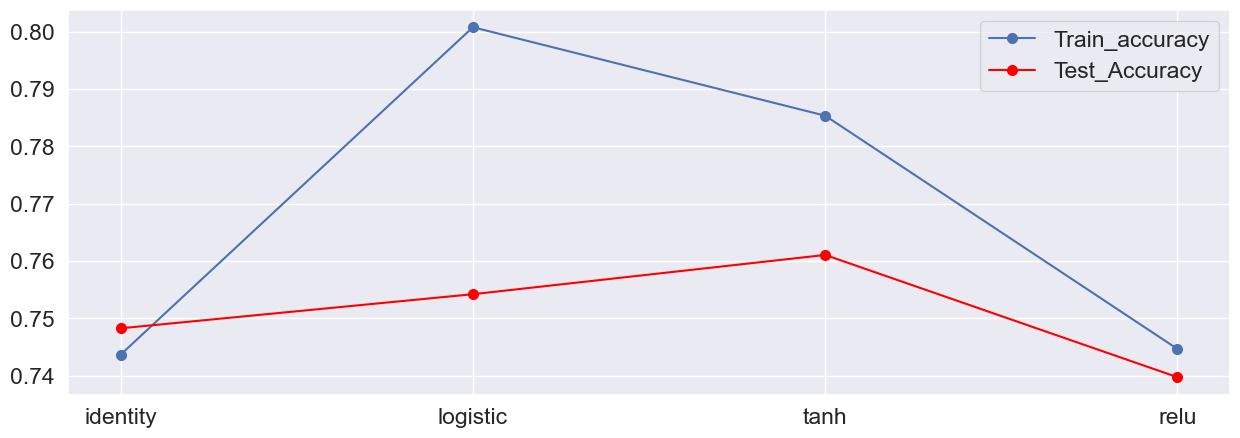

Best value (Activation):  tanh
Test (Validation) accuracy:  76.11 %


In [15]:
plt.figure(figsize=(15, 5))
sns.set(font_scale=1.5)
plt.plot(resActivation['Activation'], resActivation['Train_Accuracy'], marker='o', markersize=7)
plt.plot(resActivation['Activation'], resActivation['Test_Accuracy'], marker='o', markersize=7, color="red")
plt.legend(['Train_accuracy', 'Test_Accuracy'])
plt.show()

best_max_depth = res_SortedV.loc[res_SortedV['Test_Accuracy'].idxmax(), 'Activation']
best_max_depth_Acc = res_SortedV.loc[res_SortedV['Test_Accuracy'].idxmax(), 'Test_Accuracy']

print("Best value (Activation): ", best_max_depth)
print("Test (Validation) accuracy: ", round(best_max_depth_Acc*100, 2), "%")

# Solver

In [13]:
solver_List = ['lbfgs', 'sgd', 'adam']
print(solver_List)

['lbfgs', 'sgd', 'adam']


In [14]:
resSolver = pd.DataFrame()
for solver in solver_List:
    model = MLPClassifier(solver=solver, random_state=123, max_iter=1000, verbose = True,)
    model.fit(X_train_scaled, y_train)
    resSolver = resSolver.append({'Solver': solver,
                      'Train_Accuracy': accuracy_score(y_train, model.predict(X_train_scaled)),
                      'Test_Accuracy': accuracy_score(y_test, model.predict(X_test_scaled))}, ignore_index=True)


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Iteration 1, loss = 0.60751902
Iteration 2, loss = 0.52446053
Iteration 3, loss = 0.50096199
Iteration 4, loss = 0.48998208
Iteration 5, loss = 0.48383457
Iteration 6, loss = 0.47998435
Iteration 7, loss = 0.47738604
Iteration 8, loss = 0.47551596
Iteration 9, loss = 0.47401155
Iteration 10, loss = 0.47279958
Iteration 11, loss = 0.47175442
Iteration 12, loss = 0.47080852
Iteration 13, loss = 0.46995540
Iteration 14, loss = 0.46916740
Iteration 15, loss = 0.46846551
Iteration 16, loss = 0.46780521
Iteration 17, loss = 0.46719108
Iteration 18, loss = 0.46661450
Iteration 19, loss = 0.46608181
Iteration 20, loss = 0.46556597
Iteration 21, loss = 0.46508727
Iteration 22, loss = 0.46465344
Iteration 23, loss = 0.46424061
Iteration 24, loss = 0.46384853
Iteration 25, loss = 0.46345844
Iteration 26, loss = 0.46311479
Iteration 27, loss = 0.46276466
Iteration 28, loss = 0.46242362
Iteration 29, loss = 0.46210357
Iteration 30, loss = 0.46180793
Iteration 31, loss = 0.46153333
Iteration 32, los

Iteration 142, loss = 0.41125647
Iteration 143, loss = 0.41141238
Iteration 144, loss = 0.41139852
Iteration 145, loss = 0.41140233
Iteration 146, loss = 0.41162707
Iteration 147, loss = 0.41109947
Iteration 148, loss = 0.41077134
Iteration 149, loss = 0.41078202
Iteration 150, loss = 0.40976846
Iteration 151, loss = 0.41043464
Iteration 152, loss = 0.41076577
Iteration 153, loss = 0.41029883
Iteration 154, loss = 0.40991033
Iteration 155, loss = 0.40951407
Iteration 156, loss = 0.41064628
Iteration 157, loss = 0.40980327
Iteration 158, loss = 0.40968587
Iteration 159, loss = 0.40980160
Iteration 160, loss = 0.40924154
Iteration 161, loss = 0.40883528
Iteration 162, loss = 0.40978842
Iteration 163, loss = 0.40928677
Iteration 164, loss = 0.40847947
Iteration 165, loss = 0.40909621
Iteration 166, loss = 0.40871600
Iteration 167, loss = 0.40883959
Iteration 168, loss = 0.40889362
Iteration 169, loss = 0.40868894
Iteration 170, loss = 0.40849370
Iteration 171, loss = 0.40856318
Iteration 

In [15]:
res_SortedV2 = resSolver.copy().sort_values('Test_Accuracy', ascending=False, ignore_index= True)
res_SortedV2

,Solver,Train_Accuracy,Test_Accuracy
0,sgd,0.766231,0.758501
1,adam,0.802985,0.746156
2,lbfgs,0.816228,0.738974


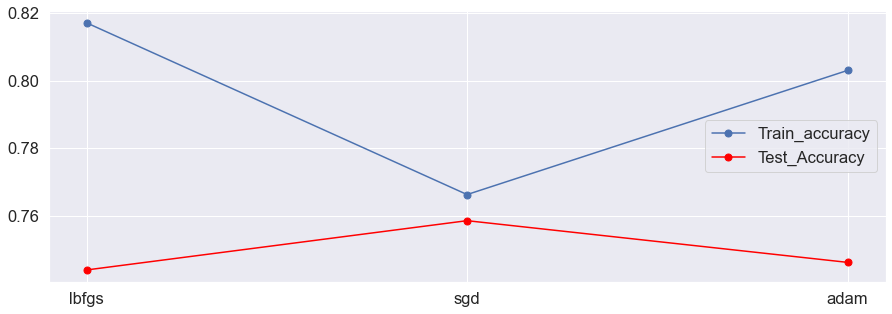

Best value (Solver):  sgd
Test (Validation) accuracy:  75.85 %


In [35]:
plt.figure(figsize=(15, 5))
sns.set(font_scale=1.5)
plt.plot(resSolver['Solver'], resSolver['Train_Accuracy'], marker='o', markersize=7)
plt.plot(resSolver['Solver'], resSolver['Test_Accuracy'], marker='o', markersize=7, color="red")
plt.legend(['Train_accuracy', 'Test_Accuracy'])
plt.show()

best_max_depth = res_SortedV2.loc[res_SortedV['Test_Accuracy'].idxmax(), 'Solver']
best_max_depth_Acc = res_SortedV2.loc[res_SortedV['Test_Accuracy'].idxmax(), 'Test_Accuracy']

print("Best value (Solver): ", best_max_depth)
print("Test (Validation) accuracy: ", round(best_max_depth_Acc*100, 2), "%")

# Learning Rate : while Solver = "sgd"

In [43]:
learningRate_List = ['constant', 'invscaling', 'adaptive']
print(learningRate_List)

['constant', 'invscaling', 'adaptive']


In [44]:
resRL = pd.DataFrame()
for learning_rate in learningRate_List:
    model = MLPClassifier(solver='sgd', learning_rate=learning_rate, random_state=123, max_iter=1000, verbose = True,)
    model.fit(X_train_scaled, y_train)
    resRL = resRL.append({'Learning Rate': learning_rate,
                      'Train_Accuracy': accuracy_score(y_train, model.predict(X_train_scaled)),
                      'Test_Accuracy': accuracy_score(y_test, model.predict(X_test_scaled))}, ignore_index=True)
    

Iteration 1, loss = 0.60751902
Iteration 2, loss = 0.52446053
Iteration 3, loss = 0.50096199
Iteration 4, loss = 0.48998208
Iteration 5, loss = 0.48383457
Iteration 6, loss = 0.47998435
Iteration 7, loss = 0.47738604
Iteration 8, loss = 0.47551596
Iteration 9, loss = 0.47401155
Iteration 10, loss = 0.47279958
Iteration 11, loss = 0.47175442
Iteration 12, loss = 0.47080852
Iteration 13, loss = 0.46995540
Iteration 14, loss = 0.46916740
Iteration 15, loss = 0.46846551
Iteration 16, loss = 0.46780521
Iteration 17, loss = 0.46719108
Iteration 18, loss = 0.46661450
Iteration 19, loss = 0.46608181
Iteration 20, loss = 0.46556597
Iteration 21, loss = 0.46508727
Iteration 22, loss = 0.46465344
Iteration 23, loss = 0.46424061
Iteration 24, loss = 0.46384853
Iteration 25, loss = 0.46345844
Iteration 26, loss = 0.46311479
Iteration 27, loss = 0.46276466
Iteration 28, loss = 0.46242362
Iteration 29, loss = 0.46210357
Iteration 30, loss = 0.46180793
Iteration 31, loss = 0.46153333
Iteration 32, los

Iteration 116, loss = 0.45092542
Iteration 117, loss = 0.45091049
Iteration 118, loss = 0.45089478
Iteration 119, loss = 0.45089478
Iteration 120, loss = 0.45087643
Iteration 121, loss = 0.45086684
Iteration 122, loss = 0.45084753
Iteration 123, loss = 0.45083540
Iteration 124, loss = 0.45082554
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000040
Iteration 125, loss = 0.45078048
Iteration 126, loss = 0.45077653
Iteration 127, loss = 0.45077343
Iteration 128, loss = 0.45077209
Iteration 129, loss = 0.45076771
Iteration 130, loss = 0.45076542
Iteration 131, loss = 0.45076415
Iteration 132, loss = 0.45076180
Iteration 133, loss = 0.45075807
Iteration 134, loss = 0.45075664
Iteration 135, loss = 0.45075381
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000008
Iteration 136, loss = 0.45074436
Iteration 137, loss = 0.45074373
Iteration 138, loss = 0.45074359
Iteration 139

,Learning Rate,Train_Accuracy,Test_Accuracy
0,adaptive,0.765922,0.758725
1,constant,0.766231,0.758501
2,invscaling,0.689524,0.685333


In [ ]:
res_SortedV3 = resRL.copy().sort_values('Test_Accuracy', ascending=False, ignore_index= True)
res_SortedV3

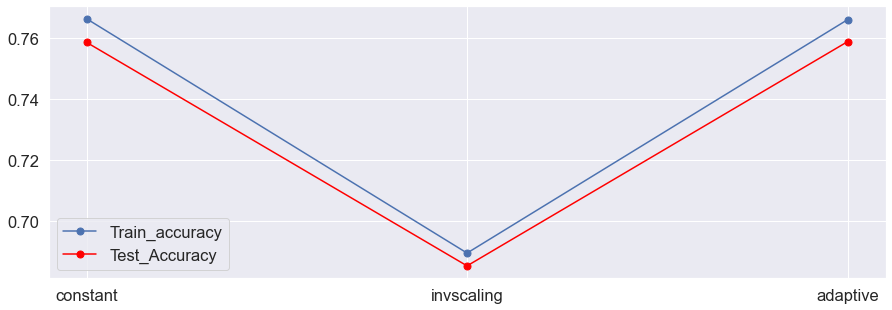

Best value (Learning Rate):  adaptive
Test (Validation) accuracy:  75.87 %


In [45]:
plt.figure(figsize=(15, 5))
sns.set(font_scale=1.5)
plt.plot(resRL['Learning Rate'], resRL['Train_Accuracy'], marker='o', markersize=7)
plt.plot(resRL['Learning Rate'], resRL['Test_Accuracy'], marker='o', markersize=7, color="red")
plt.legend(['Train_accuracy', 'Test_Accuracy'])
plt.show()

best_max_depth = res_SortedV3.loc[res_SortedV['Test_Accuracy'].idxmax(), 'Learning Rate']
best_max_depth_Acc = res_SortedV3.loc[res_SortedV['Test_Accuracy'].idxmax(), 'Test_Accuracy']

print("Best value (Learning Rate): ", best_max_depth)
print("Test (Validation) accuracy: ", round(best_max_depth_Acc*100, 2), "%")

# Learning Rate Init : Number

In [22]:
learningRate_List2 = np.arange(0.001, 0.011, 0.001)
print(learningRate_List2)

[0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01 ]


In [27]:
resRL2 = pd.DataFrame()
for learning_rate_init in learningRate_List2:
    model = MLPClassifier(learning_rate_init=learning_rate_init, random_state=123, max_iter=1000, verbose = True,)
    print("------------ Learning Rate Init: ",learning_rate_init, " ------------")
    model.fit(X_train_scaled, y_train)
    resRL2 = resRL2.append({'Learning Rate Init': learning_rate_init,
                      'Train_Accuracy': accuracy_score(y_train, model.predict(X_train_scaled)),
                      'Test_Accuracy': accuracy_score(y_test, model.predict(X_test_scaled))}, ignore_index=True)
    

------------ Learning Rate Init:  0.001  ------------
Iteration 1, loss = 0.51006979
Iteration 2, loss = 0.46732066
Iteration 3, loss = 0.46077240
Iteration 4, loss = 0.45738247
Iteration 5, loss = 0.45515607
Iteration 6, loss = 0.45386979
Iteration 7, loss = 0.45225980
Iteration 8, loss = 0.45105419
Iteration 9, loss = 0.45038686
Iteration 10, loss = 0.44929895
Iteration 11, loss = 0.44899842
Iteration 12, loss = 0.44793998
Iteration 13, loss = 0.44717750
Iteration 14, loss = 0.44688073
Iteration 15, loss = 0.44639618
Iteration 16, loss = 0.44595153
Iteration 17, loss = 0.44525422
Iteration 18, loss = 0.44481999
Iteration 19, loss = 0.44428747
Iteration 20, loss = 0.44390747
Iteration 21, loss = 0.44315259
Iteration 22, loss = 0.44287383
Iteration 23, loss = 0.44230779
Iteration 24, loss = 0.44198702
Iteration 25, loss = 0.44148405
Iteration 26, loss = 0.44124816
Iteration 27, loss = 0.44070296
Iteration 28, loss = 0.44029912
Iteration 29, loss = 0.43955882
Iteration 30, loss = 0.4389

Iteration 12, loss = 0.44584805
Iteration 13, loss = 0.44464351
Iteration 14, loss = 0.44437629
Iteration 15, loss = 0.44358403
Iteration 16, loss = 0.44336103
Iteration 17, loss = 0.44206302
Iteration 18, loss = 0.44185759
Iteration 19, loss = 0.44057869
Iteration 20, loss = 0.44078465
Iteration 21, loss = 0.43947425
Iteration 22, loss = 0.43938498
Iteration 23, loss = 0.43892172
Iteration 24, loss = 0.43802815
Iteration 25, loss = 0.43748515
Iteration 26, loss = 0.43677735
Iteration 27, loss = 0.43670498
Iteration 28, loss = 0.43562958
Iteration 29, loss = 0.43480709
Iteration 30, loss = 0.43433081
Iteration 31, loss = 0.43484573
Iteration 32, loss = 0.43416511
Iteration 33, loss = 0.43283324
Iteration 34, loss = 0.43192009
Iteration 35, loss = 0.43215826
Iteration 36, loss = 0.43118328
Iteration 37, loss = 0.43116819
Iteration 38, loss = 0.43027244
Iteration 39, loss = 0.43049461
Iteration 40, loss = 0.43002947
Iteration 41, loss = 0.42887714
Iteration 42, loss = 0.42857988
Iteratio

Iteration 49, loss = 0.42075763
Iteration 50, loss = 0.42273245
Iteration 51, loss = 0.42122615
Iteration 52, loss = 0.42153490
Iteration 53, loss = 0.42080687
Iteration 54, loss = 0.42066220
Iteration 55, loss = 0.42023055
Iteration 56, loss = 0.41878862
Iteration 57, loss = 0.42038795
Iteration 58, loss = 0.41937828
Iteration 59, loss = 0.41790282
Iteration 60, loss = 0.41837299
Iteration 61, loss = 0.41720783
Iteration 62, loss = 0.41769195
Iteration 63, loss = 0.41733613
Iteration 64, loss = 0.41729653
Iteration 65, loss = 0.41664270
Iteration 66, loss = 0.41554795
Iteration 67, loss = 0.41581339
Iteration 68, loss = 0.41505690
Iteration 69, loss = 0.41590139
Iteration 70, loss = 0.41363833
Iteration 71, loss = 0.41414783
Iteration 72, loss = 0.41481040
Iteration 73, loss = 0.41394387
Iteration 74, loss = 0.41527190
Iteration 75, loss = 0.41454811
Iteration 76, loss = 0.41440738
Iteration 77, loss = 0.41421024
Iteration 78, loss = 0.41316747
Iteration 79, loss = 0.41318193
Iteratio

Iteration 1, loss = 0.47733928
Iteration 2, loss = 0.45801505
Iteration 3, loss = 0.45581083
Iteration 4, loss = 0.45370124
Iteration 5, loss = 0.45238919
Iteration 6, loss = 0.45192044
Iteration 7, loss = 0.44967939
Iteration 8, loss = 0.44900053
Iteration 9, loss = 0.44854199
Iteration 10, loss = 0.44665385
Iteration 11, loss = 0.44716611
Iteration 12, loss = 0.44619660
Iteration 13, loss = 0.44457304
Iteration 14, loss = 0.44362030
Iteration 15, loss = 0.44293024
Iteration 16, loss = 0.44349540
Iteration 17, loss = 0.44199406
Iteration 18, loss = 0.44191562
Iteration 19, loss = 0.43997989
Iteration 20, loss = 0.44033767
Iteration 21, loss = 0.43802318
Iteration 22, loss = 0.43809419
Iteration 23, loss = 0.43813659
Iteration 24, loss = 0.43671837
Iteration 25, loss = 0.43610200
Iteration 26, loss = 0.43438267
Iteration 27, loss = 0.43429907
Iteration 28, loss = 0.43349301
Iteration 29, loss = 0.43221874
Iteration 30, loss = 0.43134169
Iteration 31, loss = 0.43225505
Iteration 32, los

Iteration 91, loss = 0.40804524
Iteration 92, loss = 0.40709659
Iteration 93, loss = 0.40711246
Iteration 94, loss = 0.40614669
Iteration 95, loss = 0.40720176
Iteration 96, loss = 0.40660596
Iteration 97, loss = 0.40588252
Iteration 98, loss = 0.40561391
Iteration 99, loss = 0.40481797
Iteration 100, loss = 0.40556706
Iteration 101, loss = 0.40530545
Iteration 102, loss = 0.40465782
Iteration 103, loss = 0.40574991
Iteration 104, loss = 0.40394040
Iteration 105, loss = 0.40418403
Iteration 106, loss = 0.40432074
Iteration 107, loss = 0.40512426
Iteration 108, loss = 0.40478310
Iteration 109, loss = 0.40410736
Iteration 110, loss = 0.40282418
Iteration 111, loss = 0.40538638
Iteration 112, loss = 0.40186625
Iteration 113, loss = 0.40532236
Iteration 114, loss = 0.40470293
Iteration 115, loss = 0.40407352
Iteration 116, loss = 0.40227275
Iteration 117, loss = 0.40307853
Iteration 118, loss = 0.40429163
Iteration 119, loss = 0.40328331
Iteration 120, loss = 0.40335227
Iteration 121, loss

Iteration 46, loss = 0.42393888
Iteration 47, loss = 0.42397461
Iteration 48, loss = 0.42220697
Iteration 49, loss = 0.42123134
Iteration 50, loss = 0.42221112
Iteration 51, loss = 0.42198615
Iteration 52, loss = 0.42154059
Iteration 53, loss = 0.42119733
Iteration 54, loss = 0.42118748
Iteration 55, loss = 0.42014543
Iteration 56, loss = 0.41811883
Iteration 57, loss = 0.42015428
Iteration 58, loss = 0.41849314
Iteration 59, loss = 0.41692916
Iteration 60, loss = 0.41887485
Iteration 61, loss = 0.41696873
Iteration 62, loss = 0.41666122
Iteration 63, loss = 0.41664713
Iteration 64, loss = 0.41708986
Iteration 65, loss = 0.41687694
Iteration 66, loss = 0.41366728
Iteration 67, loss = 0.41514667
Iteration 68, loss = 0.41444203
Iteration 69, loss = 0.41583658
Iteration 70, loss = 0.41362198
Iteration 71, loss = 0.41457581
Iteration 72, loss = 0.41419407
Iteration 73, loss = 0.41413398
Iteration 74, loss = 0.41402070
Iteration 75, loss = 0.41263122
Iteration 76, loss = 0.41320142
Iteratio

Iteration 120, loss = 0.40790901
Iteration 121, loss = 0.40599667
Iteration 122, loss = 0.40883331
Iteration 123, loss = 0.40742199
Iteration 124, loss = 0.40605466
Iteration 125, loss = 0.40655148
Iteration 126, loss = 0.40649143
Iteration 127, loss = 0.40762113
Iteration 128, loss = 0.40851767
Iteration 129, loss = 0.40539871
Iteration 130, loss = 0.40625140
Iteration 131, loss = 0.40674696
Iteration 132, loss = 0.40535000
Iteration 133, loss = 0.40566815
Iteration 134, loss = 0.40671381
Iteration 135, loss = 0.40482338
Iteration 136, loss = 0.40506038
Iteration 137, loss = 0.40474145
Iteration 138, loss = 0.40496067
Iteration 139, loss = 0.40660865
Iteration 140, loss = 0.40571549
Iteration 141, loss = 0.40591951
Iteration 142, loss = 0.40463979
Iteration 143, loss = 0.40551118
Iteration 144, loss = 0.40492899
Iteration 145, loss = 0.40494809
Iteration 146, loss = 0.40627412
Iteration 147, loss = 0.40458823
Iteration 148, loss = 0.40373457
Iteration 149, loss = 0.40425339
Iteration 

In [28]:
res_SortedV32 = resRL2.copy().sort_values('Test_Accuracy', ascending=False, ignore_index= True)
res_SortedV32

,Learning Rate Init,Train_Accuracy,Test_Accuracy
0,0.004,0.808597,0.757042
1,0.008,0.808428,0.756705
2,0.003,0.807755,0.756032
3,0.010,0.801554,0.753787
4,0.006,0.808344,0.753226
5,0.005,0.808176,0.752329
6,0.009,0.810617,0.752216
7,0.007,0.804921,0.750982
8,0.002,0.811515,0.750533
9,0.001,0.802985,0.746156


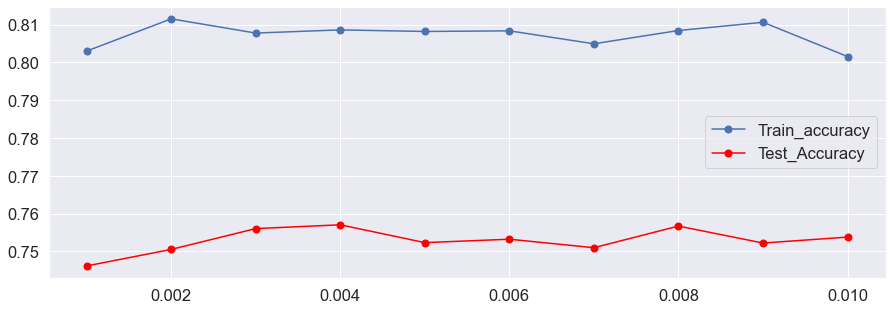

Best value (Learning Rate Init):  0.004
Test (Validation) accuracy:  75.7 %


In [30]:
plt.figure(figsize=(15, 5))
sns.set(font_scale=1.5)
plt.plot(resRL2['Learning Rate Init'], resRL2['Train_Accuracy'], marker='o', markersize=7)
plt.plot(resRL2['Learning Rate Init'], resRL2['Test_Accuracy'], marker='o', markersize=7, color="red")
plt.legend(['Train_accuracy', 'Test_Accuracy'])
plt.show()

best_max_depth = res_SortedV32.loc[res_SortedV32['Test_Accuracy'].idxmax(), 'Learning Rate Init']
best_max_depth_Acc = res_SortedV32.loc[res_SortedV32['Test_Accuracy'].idxmax(), 'Test_Accuracy']

print("Best value (Learning Rate Init): ", best_max_depth)
print("Test (Validation) accuracy: ", round(best_max_depth_Acc*100, 2), "%")

# Hidden Layer Sizes - Number Of Neurons

In [13]:
# layer_List = np.arange(5, 101, 5)
# print(layer_List)

# layer_List = np.arange(4, 121, 4)
# print(layer_List)

layer_List = np.arange(10, 123, 2)
print(layer_List)

[ 10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44
  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78  80
  82  84  86  88  90  92  94  96  98 100 102 104 106 108 110 112 114 116
 118 120 122]


In [14]:
resHLS = pd.DataFrame()
for hidden_layer_sizes in layer_List:
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, random_state=123, max_iter=1000, verbose = True,)
    print("------------ Number Of Neurons: ",hidden_layer_sizes, " ------------")
    model.fit(X_train_scaled, y_train)
    resHLS = resHLS.append({'Hidden Layer Sizes': hidden_layer_sizes,
                      'Train_Accuracy': accuracy_score(y_train, model.predict(X_train_scaled)),
                      'Test_Accuracy': accuracy_score(y_test, model.predict(X_test_scaled))}, ignore_index=True)
    print("Number Of Neurons: ",hidden_layer_sizes)
    

------------ Number Of Neurons:  10  ------------
Iteration 1, loss = 0.57307422
Iteration 2, loss = 0.49310978
Iteration 3, loss = 0.47716021
Iteration 4, loss = 0.47083497
Iteration 5, loss = 0.46736772
Iteration 6, loss = 0.46513416
Iteration 7, loss = 0.46344766
Iteration 8, loss = 0.46219040
Iteration 9, loss = 0.46113676
Iteration 10, loss = 0.46024633
Iteration 11, loss = 0.45951703
Iteration 12, loss = 0.45888326
Iteration 13, loss = 0.45821061
Iteration 14, loss = 0.45778047
Iteration 15, loss = 0.45731138
Iteration 16, loss = 0.45683646
Iteration 17, loss = 0.45648014
Iteration 18, loss = 0.45598294
Iteration 19, loss = 0.45566346
Iteration 20, loss = 0.45519558
Iteration 21, loss = 0.45486093
Iteration 22, loss = 0.45462607
Iteration 23, loss = 0.45436328
Iteration 24, loss = 0.45419043
Iteration 25, loss = 0.45404147
Iteration 26, loss = 0.45374483
Iteration 27, loss = 0.45363779
Iteration 28, loss = 0.45357262
Iteration 29, loss = 0.45327310
Iteration 30, loss = 0.45326093

Iteration 82, loss = 0.44868921
Iteration 83, loss = 0.44869661
Iteration 84, loss = 0.44867035
Iteration 85, loss = 0.44857788
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Number Of Neurons:  14
------------ Number Of Neurons:  16  ------------
Iteration 1, loss = 0.69372670
Iteration 2, loss = 0.52172724
Iteration 3, loss = 0.49016900
Iteration 4, loss = 0.47827235
Iteration 5, loss = 0.47237731
Iteration 6, loss = 0.46877876
Iteration 7, loss = 0.46624252
Iteration 8, loss = 0.46409799
Iteration 9, loss = 0.46228672
Iteration 10, loss = 0.46122453
Iteration 11, loss = 0.45999015
Iteration 12, loss = 0.45916713
Iteration 13, loss = 0.45826668
Iteration 14, loss = 0.45746113
Iteration 15, loss = 0.45672285
Iteration 16, loss = 0.45608879
Iteration 17, loss = 0.45547364
Iteration 18, loss = 0.45508867
Iteration 19, loss = 0.45457596
Iteration 20, loss = 0.45414645
Iteration 21, loss = 0.45377450
Iteration 22, loss = 0.45328443
Iteration 23, 

Iteration 43, loss = 0.44813211
Iteration 44, loss = 0.44791394
Iteration 45, loss = 0.44797688
Iteration 46, loss = 0.44772495
Iteration 47, loss = 0.44763371
Iteration 48, loss = 0.44745408
Iteration 49, loss = 0.44758813
Iteration 50, loss = 0.44739580
Iteration 51, loss = 0.44734576
Iteration 52, loss = 0.44718709
Iteration 53, loss = 0.44728187
Iteration 54, loss = 0.44704615
Iteration 55, loss = 0.44692506
Iteration 56, loss = 0.44689830
Iteration 57, loss = 0.44680778
Iteration 58, loss = 0.44692076
Iteration 59, loss = 0.44686530
Iteration 60, loss = 0.44685412
Iteration 61, loss = 0.44670651
Iteration 62, loss = 0.44639190
Iteration 63, loss = 0.44660681
Iteration 64, loss = 0.44658387
Iteration 65, loss = 0.44641966
Iteration 66, loss = 0.44633579
Iteration 67, loss = 0.44638475
Iteration 68, loss = 0.44625912
Iteration 69, loss = 0.44626053
Iteration 70, loss = 0.44604632
Iteration 71, loss = 0.44613923
Iteration 72, loss = 0.44611174
Iteration 73, loss = 0.44592921
Iteratio

Iteration 3, loss = 0.47166073
Iteration 4, loss = 0.46718893
Iteration 5, loss = 0.46367252
Iteration 6, loss = 0.46110733
Iteration 7, loss = 0.45904005
Iteration 8, loss = 0.45755425
Iteration 9, loss = 0.45624951
Iteration 10, loss = 0.45498351
Iteration 11, loss = 0.45430306
Iteration 12, loss = 0.45366747
Iteration 13, loss = 0.45304182
Iteration 14, loss = 0.45261154
Iteration 15, loss = 0.45209911
Iteration 16, loss = 0.45153730
Iteration 17, loss = 0.45156537
Iteration 18, loss = 0.45127356
Iteration 19, loss = 0.45070482
Iteration 20, loss = 0.45066935
Iteration 21, loss = 0.45049869
Iteration 22, loss = 0.45011817
Iteration 23, loss = 0.44987927
Iteration 24, loss = 0.44954231
Iteration 25, loss = 0.44966153
Iteration 26, loss = 0.44943406
Iteration 27, loss = 0.44917593
Iteration 28, loss = 0.44916631
Iteration 29, loss = 0.44873517
Iteration 30, loss = 0.44882738
Iteration 31, loss = 0.44853929
Iteration 32, loss = 0.44853684
Iteration 33, loss = 0.44827407
Iteration 34, l

Iteration 112, loss = 0.44186989
Iteration 113, loss = 0.44169414
Iteration 114, loss = 0.44173363
Iteration 115, loss = 0.44170565
Iteration 116, loss = 0.44167721
Iteration 117, loss = 0.44147056
Iteration 118, loss = 0.44151101
Iteration 119, loss = 0.44143688
Iteration 120, loss = 0.44131988
Iteration 121, loss = 0.44150202
Iteration 122, loss = 0.44133971
Iteration 123, loss = 0.44130544
Iteration 124, loss = 0.44103288
Iteration 125, loss = 0.44120883
Iteration 126, loss = 0.44127265
Iteration 127, loss = 0.44125370
Iteration 128, loss = 0.44107001
Iteration 129, loss = 0.44093170
Iteration 130, loss = 0.44099064
Iteration 131, loss = 0.44073623
Iteration 132, loss = 0.44136984
Iteration 133, loss = 0.44087177
Iteration 134, loss = 0.44069628
Iteration 135, loss = 0.44077348
Iteration 136, loss = 0.44075224
Iteration 137, loss = 0.44070913
Iteration 138, loss = 0.44058616
Iteration 139, loss = 0.44076175
Iteration 140, loss = 0.44093100
Iteration 141, loss = 0.44073341
Iteration 

Iteration 67, loss = 0.44384220
Iteration 68, loss = 0.44373732
Iteration 69, loss = 0.44354280
Iteration 70, loss = 0.44344608
Iteration 71, loss = 0.44371892
Iteration 72, loss = 0.44344961
Iteration 73, loss = 0.44339987
Iteration 74, loss = 0.44347385
Iteration 75, loss = 0.44325650
Iteration 76, loss = 0.44321179
Iteration 77, loss = 0.44317636
Iteration 78, loss = 0.44314452
Iteration 79, loss = 0.44277089
Iteration 80, loss = 0.44308314
Iteration 81, loss = 0.44297640
Iteration 82, loss = 0.44272685
Iteration 83, loss = 0.44261653
Iteration 84, loss = 0.44257826
Iteration 85, loss = 0.44283972
Iteration 86, loss = 0.44248227
Iteration 87, loss = 0.44237478
Iteration 88, loss = 0.44219480
Iteration 89, loss = 0.44232150
Iteration 90, loss = 0.44227957
Iteration 91, loss = 0.44235972
Iteration 92, loss = 0.44241216
Iteration 93, loss = 0.44208415
Iteration 94, loss = 0.44219258
Iteration 95, loss = 0.44191343
Iteration 96, loss = 0.44184390
Iteration 97, loss = 0.44209931
Iteratio

Iteration 51, loss = 0.44335382
Iteration 52, loss = 0.44332887
Iteration 53, loss = 0.44331043
Iteration 54, loss = 0.44325095
Iteration 55, loss = 0.44299163
Iteration 56, loss = 0.44268421
Iteration 57, loss = 0.44267382
Iteration 58, loss = 0.44268138
Iteration 59, loss = 0.44230099
Iteration 60, loss = 0.44267315
Iteration 61, loss = 0.44245245
Iteration 62, loss = 0.44253837
Iteration 63, loss = 0.44250106
Iteration 64, loss = 0.44228244
Iteration 65, loss = 0.44214371
Iteration 66, loss = 0.44202370
Iteration 67, loss = 0.44165784
Iteration 68, loss = 0.44201440
Iteration 69, loss = 0.44171445
Iteration 70, loss = 0.44162140
Iteration 71, loss = 0.44155758
Iteration 72, loss = 0.44159506
Iteration 73, loss = 0.44120807
Iteration 74, loss = 0.44137580
Iteration 75, loss = 0.44126119
Iteration 76, loss = 0.44140927
Iteration 77, loss = 0.44089907
Iteration 78, loss = 0.44105003
Iteration 79, loss = 0.44075513
Iteration 80, loss = 0.44076849
Iteration 81, loss = 0.44079488
Iteratio

Iteration 139, loss = 0.43685194
Iteration 140, loss = 0.43671084
Iteration 141, loss = 0.43676563
Iteration 142, loss = 0.43695769
Iteration 143, loss = 0.43649436
Iteration 144, loss = 0.43666971
Iteration 145, loss = 0.43645191
Iteration 146, loss = 0.43688494
Iteration 147, loss = 0.43640515
Iteration 148, loss = 0.43609308
Iteration 149, loss = 0.43655214
Iteration 150, loss = 0.43630828
Iteration 151, loss = 0.43632505
Iteration 152, loss = 0.43661091
Iteration 153, loss = 0.43652379
Iteration 154, loss = 0.43644590
Iteration 155, loss = 0.43632528
Iteration 156, loss = 0.43619735
Iteration 157, loss = 0.43622817
Iteration 158, loss = 0.43586922
Iteration 159, loss = 0.43608499
Iteration 160, loss = 0.43598645
Iteration 161, loss = 0.43603189
Iteration 162, loss = 0.43615943
Iteration 163, loss = 0.43621329
Iteration 164, loss = 0.43592014
Iteration 165, loss = 0.43574265
Iteration 166, loss = 0.43602355
Iteration 167, loss = 0.43587760
Iteration 168, loss = 0.43595691
Iteration 

Iteration 14, loss = 0.45119941
Iteration 15, loss = 0.45093511
Iteration 16, loss = 0.45043569
Iteration 17, loss = 0.45031006
Iteration 18, loss = 0.44975197
Iteration 19, loss = 0.44954711
Iteration 20, loss = 0.44900018
Iteration 21, loss = 0.44848529
Iteration 22, loss = 0.44874259
Iteration 23, loss = 0.44830011
Iteration 24, loss = 0.44794230
Iteration 25, loss = 0.44771320
Iteration 26, loss = 0.44742420
Iteration 27, loss = 0.44741678
Iteration 28, loss = 0.44710381
Iteration 29, loss = 0.44685746
Iteration 30, loss = 0.44666486
Iteration 31, loss = 0.44628860
Iteration 32, loss = 0.44620184
Iteration 33, loss = 0.44611464
Iteration 34, loss = 0.44589636
Iteration 35, loss = 0.44584631
Iteration 36, loss = 0.44546832
Iteration 37, loss = 0.44516138
Iteration 38, loss = 0.44519658
Iteration 39, loss = 0.44510773
Iteration 40, loss = 0.44483258
Iteration 41, loss = 0.44461062
Iteration 42, loss = 0.44471959
Iteration 43, loss = 0.44445918
Iteration 44, loss = 0.44440048
Iteratio

Iteration 75, loss = 0.43875848
Iteration 76, loss = 0.43887855
Iteration 77, loss = 0.43861311
Iteration 78, loss = 0.43878483
Iteration 79, loss = 0.43852727
Iteration 80, loss = 0.43866361
Iteration 81, loss = 0.43828110
Iteration 82, loss = 0.43812595
Iteration 83, loss = 0.43856748
Iteration 84, loss = 0.43805680
Iteration 85, loss = 0.43784318
Iteration 86, loss = 0.43793118
Iteration 87, loss = 0.43783352
Iteration 88, loss = 0.43796315
Iteration 89, loss = 0.43779077
Iteration 90, loss = 0.43763980
Iteration 91, loss = 0.43745396
Iteration 92, loss = 0.43734585
Iteration 93, loss = 0.43738512
Iteration 94, loss = 0.43749564
Iteration 95, loss = 0.43731121
Iteration 96, loss = 0.43740708
Iteration 97, loss = 0.43700087
Iteration 98, loss = 0.43722788
Iteration 99, loss = 0.43696841
Iteration 100, loss = 0.43697608
Iteration 101, loss = 0.43715365
Iteration 102, loss = 0.43692986
Iteration 103, loss = 0.43712461
Iteration 104, loss = 0.43663381
Iteration 105, loss = 0.43673148
It

Iteration 120, loss = 0.43504607
Iteration 121, loss = 0.43524059
Iteration 122, loss = 0.43532910
Iteration 123, loss = 0.43514917
Iteration 124, loss = 0.43524338
Iteration 125, loss = 0.43484644
Iteration 126, loss = 0.43540220
Iteration 127, loss = 0.43476316
Iteration 128, loss = 0.43506986
Iteration 129, loss = 0.43504604
Iteration 130, loss = 0.43445872
Iteration 131, loss = 0.43480030
Iteration 132, loss = 0.43459574
Iteration 133, loss = 0.43482608
Iteration 134, loss = 0.43426591
Iteration 135, loss = 0.43426087
Iteration 136, loss = 0.43417247
Iteration 137, loss = 0.43427459
Iteration 138, loss = 0.43420458
Iteration 139, loss = 0.43412161
Iteration 140, loss = 0.43420759
Iteration 141, loss = 0.43407310
Iteration 142, loss = 0.43369204
Iteration 143, loss = 0.43434411
Iteration 144, loss = 0.43402280
Iteration 145, loss = 0.43391951
Iteration 146, loss = 0.43411591
Iteration 147, loss = 0.43387398
Iteration 148, loss = 0.43345002
Iteration 149, loss = 0.43379381
Iteration 

Iteration 141, loss = 0.43356653
Iteration 142, loss = 0.43330753
Iteration 143, loss = 0.43306570
Iteration 144, loss = 0.43329887
Iteration 145, loss = 0.43338585
Iteration 146, loss = 0.43307595
Iteration 147, loss = 0.43263764
Iteration 148, loss = 0.43291691
Iteration 149, loss = 0.43305943
Iteration 150, loss = 0.43299397
Iteration 151, loss = 0.43243290
Iteration 152, loss = 0.43264732
Iteration 153, loss = 0.43275405
Iteration 154, loss = 0.43270954
Iteration 155, loss = 0.43287576
Iteration 156, loss = 0.43246220
Iteration 157, loss = 0.43235218
Iteration 158, loss = 0.43246561
Iteration 159, loss = 0.43236771
Iteration 160, loss = 0.43225471
Iteration 161, loss = 0.43191300
Iteration 162, loss = 0.43227153
Iteration 163, loss = 0.43228934
Iteration 164, loss = 0.43249899
Iteration 165, loss = 0.43209097
Iteration 166, loss = 0.43213827
Iteration 167, loss = 0.43219463
Iteration 168, loss = 0.43193191
Iteration 169, loss = 0.43176363
Iteration 170, loss = 0.43225153
Iteration 

Iteration 163, loss = 0.43107019
Iteration 164, loss = 0.43093553
Iteration 165, loss = 0.43105491
Iteration 166, loss = 0.43096513
Iteration 167, loss = 0.43053355
Iteration 168, loss = 0.43110034
Iteration 169, loss = 0.43099278
Iteration 170, loss = 0.43045285
Iteration 171, loss = 0.43084560
Iteration 172, loss = 0.43072658
Iteration 173, loss = 0.43053461
Iteration 174, loss = 0.43105204
Iteration 175, loss = 0.43115377
Iteration 176, loss = 0.43071480
Iteration 177, loss = 0.43022118
Iteration 178, loss = 0.43052274
Iteration 179, loss = 0.43034517
Iteration 180, loss = 0.43059950
Iteration 181, loss = 0.43022095
Iteration 182, loss = 0.43030166
Iteration 183, loss = 0.43031620
Iteration 184, loss = 0.43056556
Iteration 185, loss = 0.43050243
Iteration 186, loss = 0.43008775
Iteration 187, loss = 0.43009924
Iteration 188, loss = 0.43047851
Iteration 189, loss = 0.43029483
Iteration 190, loss = 0.43119113
Iteration 191, loss = 0.43038433
Iteration 192, loss = 0.42987855
Iteration 

Iteration 40, loss = 0.44109150
Iteration 41, loss = 0.44161685
Iteration 42, loss = 0.44105133
Iteration 43, loss = 0.44031187
Iteration 44, loss = 0.44053989
Iteration 45, loss = 0.44009391
Iteration 46, loss = 0.44012514
Iteration 47, loss = 0.43982866
Iteration 48, loss = 0.44000756
Iteration 49, loss = 0.43936786
Iteration 50, loss = 0.43937340
Iteration 51, loss = 0.43907042
Iteration 52, loss = 0.43893327
Iteration 53, loss = 0.43919636
Iteration 54, loss = 0.43871660
Iteration 55, loss = 0.43870898
Iteration 56, loss = 0.43857171
Iteration 57, loss = 0.43818006
Iteration 58, loss = 0.43796857
Iteration 59, loss = 0.43777342
Iteration 60, loss = 0.43771155
Iteration 61, loss = 0.43781870
Iteration 62, loss = 0.43762169
Iteration 63, loss = 0.43724056
Iteration 64, loss = 0.43695756
Iteration 65, loss = 0.43688635
Iteration 66, loss = 0.43686217
Iteration 67, loss = 0.43687475
Iteration 68, loss = 0.43679400
Iteration 69, loss = 0.43647163
Iteration 70, loss = 0.43676799
Iteratio

Iteration 50, loss = 0.44045471
Iteration 51, loss = 0.43990076
Iteration 52, loss = 0.44016706
Iteration 53, loss = 0.43969549
Iteration 54, loss = 0.43964858
Iteration 55, loss = 0.43966743
Iteration 56, loss = 0.43935582
Iteration 57, loss = 0.43916109
Iteration 58, loss = 0.43881196
Iteration 59, loss = 0.43889508
Iteration 60, loss = 0.43913243
Iteration 61, loss = 0.43848364
Iteration 62, loss = 0.43855427
Iteration 63, loss = 0.43834262
Iteration 64, loss = 0.43799596
Iteration 65, loss = 0.43823783
Iteration 66, loss = 0.43816347
Iteration 67, loss = 0.43791368
Iteration 68, loss = 0.43746740
Iteration 69, loss = 0.43772579
Iteration 70, loss = 0.43774745
Iteration 71, loss = 0.43732944
Iteration 72, loss = 0.43746165
Iteration 73, loss = 0.43686312
Iteration 74, loss = 0.43661177
Iteration 75, loss = 0.43640538
Iteration 76, loss = 0.43666825
Iteration 77, loss = 0.43660466
Iteration 78, loss = 0.43581329
Iteration 79, loss = 0.43594581
Iteration 80, loss = 0.43606509
Iteratio

Iteration 35, loss = 0.44255109
Iteration 36, loss = 0.44215639
Iteration 37, loss = 0.44208248
Iteration 38, loss = 0.44168593
Iteration 39, loss = 0.44157639
Iteration 40, loss = 0.44136337
Iteration 41, loss = 0.44136439
Iteration 42, loss = 0.44045879
Iteration 43, loss = 0.44074128
Iteration 44, loss = 0.44029851
Iteration 45, loss = 0.44001141
Iteration 46, loss = 0.43983784
Iteration 47, loss = 0.43955608
Iteration 48, loss = 0.43930649
Iteration 49, loss = 0.43930454
Iteration 50, loss = 0.43890392
Iteration 51, loss = 0.43905750
Iteration 52, loss = 0.43874821
Iteration 53, loss = 0.43819066
Iteration 54, loss = 0.43829959
Iteration 55, loss = 0.43836279
Iteration 56, loss = 0.43799206
Iteration 57, loss = 0.43753663
Iteration 58, loss = 0.43746225
Iteration 59, loss = 0.43770835
Iteration 60, loss = 0.43736042
Iteration 61, loss = 0.43735499
Iteration 62, loss = 0.43667596
Iteration 63, loss = 0.43693823
Iteration 64, loss = 0.43660703
Iteration 65, loss = 0.43647267
Iteratio

Iteration 107, loss = 0.43081004
Iteration 108, loss = 0.43027338
Iteration 109, loss = 0.43053371
Iteration 110, loss = 0.43029143
Iteration 111, loss = 0.42999067
Iteration 112, loss = 0.42975491
Iteration 113, loss = 0.43002760
Iteration 114, loss = 0.42991470
Iteration 115, loss = 0.42972395
Iteration 116, loss = 0.42945446
Iteration 117, loss = 0.42939893
Iteration 118, loss = 0.42934816
Iteration 119, loss = 0.42928243
Iteration 120, loss = 0.42917385
Iteration 121, loss = 0.42937389
Iteration 122, loss = 0.42911753
Iteration 123, loss = 0.42906293
Iteration 124, loss = 0.42900375
Iteration 125, loss = 0.42913780
Iteration 126, loss = 0.42842784
Iteration 127, loss = 0.42873137
Iteration 128, loss = 0.42860175
Iteration 129, loss = 0.42852086
Iteration 130, loss = 0.42836571
Iteration 131, loss = 0.42812070
Iteration 132, loss = 0.42871460
Iteration 133, loss = 0.42797422
Iteration 134, loss = 0.42852773
Iteration 135, loss = 0.42791953
Iteration 136, loss = 0.42774558
Iteration 

Iteration 173, loss = 0.42454656
Iteration 174, loss = 0.42501366
Iteration 175, loss = 0.42492266
Iteration 176, loss = 0.42498300
Iteration 177, loss = 0.42418381
Iteration 178, loss = 0.42458199
Iteration 179, loss = 0.42496367
Iteration 180, loss = 0.42448444
Iteration 181, loss = 0.42454390
Iteration 182, loss = 0.42440437
Iteration 183, loss = 0.42424571
Iteration 184, loss = 0.42416520
Iteration 185, loss = 0.42420733
Iteration 186, loss = 0.42401848
Iteration 187, loss = 0.42411788
Iteration 188, loss = 0.42389805
Iteration 189, loss = 0.42396450
Iteration 190, loss = 0.42412310
Iteration 191, loss = 0.42399860
Iteration 192, loss = 0.42441377
Iteration 193, loss = 0.42420006
Iteration 194, loss = 0.42402478
Iteration 195, loss = 0.42367002
Iteration 196, loss = 0.42317341
Iteration 197, loss = 0.42338445
Iteration 198, loss = 0.42436411
Iteration 199, loss = 0.42353825
Iteration 200, loss = 0.42337272
Iteration 201, loss = 0.42376384
Iteration 202, loss = 0.42325806
Iteration 

Iteration 42, loss = 0.43944676
Iteration 43, loss = 0.43950453
Iteration 44, loss = 0.43896771
Iteration 45, loss = 0.43911964
Iteration 46, loss = 0.43845866
Iteration 47, loss = 0.43832417
Iteration 48, loss = 0.43847452
Iteration 49, loss = 0.43769719
Iteration 50, loss = 0.43773350
Iteration 51, loss = 0.43746750
Iteration 52, loss = 0.43729240
Iteration 53, loss = 0.43695975
Iteration 54, loss = 0.43659603
Iteration 55, loss = 0.43649502
Iteration 56, loss = 0.43633337
Iteration 57, loss = 0.43570934
Iteration 58, loss = 0.43579350
Iteration 59, loss = 0.43543166
Iteration 60, loss = 0.43544830
Iteration 61, loss = 0.43545116
Iteration 62, loss = 0.43546486
Iteration 63, loss = 0.43464834
Iteration 64, loss = 0.43421902
Iteration 65, loss = 0.43437615
Iteration 66, loss = 0.43412628
Iteration 67, loss = 0.43380540
Iteration 68, loss = 0.43386248
Iteration 69, loss = 0.43358748
Iteration 70, loss = 0.43385809
Iteration 71, loss = 0.43322504
Iteration 72, loss = 0.43289266
Iteratio

Iteration 57, loss = 0.43621016
Iteration 58, loss = 0.43578743
Iteration 59, loss = 0.43617893
Iteration 60, loss = 0.43554875
Iteration 61, loss = 0.43533429
Iteration 62, loss = 0.43498502
Iteration 63, loss = 0.43509745
Iteration 64, loss = 0.43503312
Iteration 65, loss = 0.43471007
Iteration 66, loss = 0.43476673
Iteration 67, loss = 0.43472941
Iteration 68, loss = 0.43420570
Iteration 69, loss = 0.43418439
Iteration 70, loss = 0.43448938
Iteration 71, loss = 0.43394228
Iteration 72, loss = 0.43358340
Iteration 73, loss = 0.43382862
Iteration 74, loss = 0.43333158
Iteration 75, loss = 0.43292349
Iteration 76, loss = 0.43317117
Iteration 77, loss = 0.43264115
Iteration 78, loss = 0.43239776
Iteration 79, loss = 0.43239770
Iteration 80, loss = 0.43228666
Iteration 81, loss = 0.43226495
Iteration 82, loss = 0.43223065
Iteration 83, loss = 0.43235902
Iteration 84, loss = 0.43158377
Iteration 85, loss = 0.43227238
Iteration 86, loss = 0.43136831
Iteration 87, loss = 0.43148589
Iteratio

Iteration 151, loss = 0.42236065
Iteration 152, loss = 0.42196804
Iteration 153, loss = 0.42249305
Iteration 154, loss = 0.42146411
Iteration 155, loss = 0.42216555
Iteration 156, loss = 0.42167680
Iteration 157, loss = 0.42203679
Iteration 158, loss = 0.42120945
Iteration 159, loss = 0.42122023
Iteration 160, loss = 0.42116798
Iteration 161, loss = 0.42118124
Iteration 162, loss = 0.42147160
Iteration 163, loss = 0.42124212
Iteration 164, loss = 0.42075122
Iteration 165, loss = 0.42070108
Iteration 166, loss = 0.42102904
Iteration 167, loss = 0.42059222
Iteration 168, loss = 0.42055218
Iteration 169, loss = 0.42097507
Iteration 170, loss = 0.42093910
Iteration 171, loss = 0.42051704
Iteration 172, loss = 0.42041823
Iteration 173, loss = 0.42046561
Iteration 174, loss = 0.42034881
Iteration 175, loss = 0.42020193
Iteration 176, loss = 0.42016039
Iteration 177, loss = 0.42034883
Iteration 178, loss = 0.42097880
Iteration 179, loss = 0.42007476
Iteration 180, loss = 0.42033816
Iteration 

Iteration 149, loss = 0.42317707
Iteration 150, loss = 0.42311065
Iteration 151, loss = 0.42316917
Iteration 152, loss = 0.42323203
Iteration 153, loss = 0.42312304
Iteration 154, loss = 0.42242236
Iteration 155, loss = 0.42283027
Iteration 156, loss = 0.42328110
Iteration 157, loss = 0.42284127
Iteration 158, loss = 0.42223117
Iteration 159, loss = 0.42198199
Iteration 160, loss = 0.42249327
Iteration 161, loss = 0.42215601
Iteration 162, loss = 0.42295425
Iteration 163, loss = 0.42187524
Iteration 164, loss = 0.42242696
Iteration 165, loss = 0.42221655
Iteration 166, loss = 0.42192414
Iteration 167, loss = 0.42200822
Iteration 168, loss = 0.42204630
Iteration 169, loss = 0.42196484
Iteration 170, loss = 0.42210783
Iteration 171, loss = 0.42186163
Iteration 172, loss = 0.42167026
Iteration 173, loss = 0.42124735
Iteration 174, loss = 0.42153768
Iteration 175, loss = 0.42135540
Iteration 176, loss = 0.42135862
Iteration 177, loss = 0.42095862
Iteration 178, loss = 0.42162410
Iteration 

Iteration 165, loss = 0.42177490
Iteration 166, loss = 0.42189093
Iteration 167, loss = 0.42278460
Iteration 168, loss = 0.42271609
Iteration 169, loss = 0.42200026
Iteration 170, loss = 0.42129309
Iteration 171, loss = 0.42168249
Iteration 172, loss = 0.42206859
Iteration 173, loss = 0.42137796
Iteration 174, loss = 0.42128808
Iteration 175, loss = 0.42202430
Iteration 176, loss = 0.42090307
Iteration 177, loss = 0.42091743
Iteration 178, loss = 0.42151899
Iteration 179, loss = 0.42165877
Iteration 180, loss = 0.42110121
Iteration 181, loss = 0.42067817
Iteration 182, loss = 0.42102872
Iteration 183, loss = 0.42119167
Iteration 184, loss = 0.42076900
Iteration 185, loss = 0.42074041
Iteration 186, loss = 0.42067643
Iteration 187, loss = 0.42087074
Iteration 188, loss = 0.42077100
Iteration 189, loss = 0.42048978
Iteration 190, loss = 0.42044311
Iteration 191, loss = 0.42019204
Iteration 192, loss = 0.42014238
Iteration 193, loss = 0.42006057
Iteration 194, loss = 0.42038545
Iteration 

Iteration 129, loss = 0.42232719
Iteration 130, loss = 0.42233346
Iteration 131, loss = 0.42202922
Iteration 132, loss = 0.42174666
Iteration 133, loss = 0.42216759
Iteration 134, loss = 0.42187029
Iteration 135, loss = 0.42188958
Iteration 136, loss = 0.42200080
Iteration 137, loss = 0.42225249
Iteration 138, loss = 0.42164813
Iteration 139, loss = 0.42133649
Iteration 140, loss = 0.42195891
Iteration 141, loss = 0.42081103
Iteration 142, loss = 0.42161979
Iteration 143, loss = 0.42128418
Iteration 144, loss = 0.42113112
Iteration 145, loss = 0.42151340
Iteration 146, loss = 0.42187706
Iteration 147, loss = 0.42055342
Iteration 148, loss = 0.42070331
Iteration 149, loss = 0.42071149
Iteration 150, loss = 0.42029350
Iteration 151, loss = 0.42085504
Iteration 152, loss = 0.42138252
Iteration 153, loss = 0.42077867
Iteration 154, loss = 0.42045417
Iteration 155, loss = 0.42045488
Iteration 156, loss = 0.42021962
Iteration 157, loss = 0.42034942
Iteration 158, loss = 0.42075664
Iteration 

Iteration 215, loss = 0.41708201
Iteration 216, loss = 0.41773553
Iteration 217, loss = 0.41727653
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Number Of Neurons:  78
------------ Number Of Neurons:  80  ------------
Iteration 1, loss = 0.51239239
Iteration 2, loss = 0.46859934
Iteration 3, loss = 0.46088309
Iteration 4, loss = 0.45742628
Iteration 5, loss = 0.45533676
Iteration 6, loss = 0.45367064
Iteration 7, loss = 0.45221646
Iteration 8, loss = 0.45099102
Iteration 9, loss = 0.45038662
Iteration 10, loss = 0.44933181
Iteration 11, loss = 0.44853409
Iteration 12, loss = 0.44808226
Iteration 13, loss = 0.44755873
Iteration 14, loss = 0.44704874
Iteration 15, loss = 0.44646266
Iteration 16, loss = 0.44570107
Iteration 17, loss = 0.44536670
Iteration 18, loss = 0.44506462
Iteration 19, loss = 0.44454234
Iteration 20, loss = 0.44432470
Iteration 21, loss = 0.44372131
Iteration 22, loss = 0.44340819
Iteration 23, loss = 0.44284708
Iteration 2

Iteration 13, loss = 0.44805765
Iteration 14, loss = 0.44751187
Iteration 15, loss = 0.44716182
Iteration 16, loss = 0.44665327
Iteration 17, loss = 0.44599619
Iteration 18, loss = 0.44574432
Iteration 19, loss = 0.44534494
Iteration 20, loss = 0.44479744
Iteration 21, loss = 0.44460135
Iteration 22, loss = 0.44399971
Iteration 23, loss = 0.44369444
Iteration 24, loss = 0.44364489
Iteration 25, loss = 0.44281736
Iteration 26, loss = 0.44269862
Iteration 27, loss = 0.44250163
Iteration 28, loss = 0.44208545
Iteration 29, loss = 0.44172595
Iteration 30, loss = 0.44131114
Iteration 31, loss = 0.44103822
Iteration 32, loss = 0.44086918
Iteration 33, loss = 0.44040088
Iteration 34, loss = 0.44035990
Iteration 35, loss = 0.43981132
Iteration 36, loss = 0.43944642
Iteration 37, loss = 0.43921280
Iteration 38, loss = 0.43928553
Iteration 39, loss = 0.43864725
Iteration 40, loss = 0.43830700
Iteration 41, loss = 0.43823043
Iteration 42, loss = 0.43758998
Iteration 43, loss = 0.43741847
Iteratio

Iteration 62, loss = 0.43211813
Iteration 63, loss = 0.43182457
Iteration 64, loss = 0.43147425
Iteration 65, loss = 0.43079064
Iteration 66, loss = 0.43058943
Iteration 67, loss = 0.43044726
Iteration 68, loss = 0.43065294
Iteration 69, loss = 0.43036773
Iteration 70, loss = 0.42972262
Iteration 71, loss = 0.42976288
Iteration 72, loss = 0.42922278
Iteration 73, loss = 0.42898089
Iteration 74, loss = 0.42859169
Iteration 75, loss = 0.42861246
Iteration 76, loss = 0.42842417
Iteration 77, loss = 0.42862193
Iteration 78, loss = 0.42834290
Iteration 79, loss = 0.42831108
Iteration 80, loss = 0.42757758
Iteration 81, loss = 0.42742350
Iteration 82, loss = 0.42740971
Iteration 83, loss = 0.42700007
Iteration 84, loss = 0.42658176
Iteration 85, loss = 0.42639023
Iteration 86, loss = 0.42602532
Iteration 87, loss = 0.42587461
Iteration 88, loss = 0.42562657
Iteration 89, loss = 0.42496056
Iteration 90, loss = 0.42512029
Iteration 91, loss = 0.42529994
Iteration 92, loss = 0.42499262
Iteratio

Iteration 89, loss = 0.42583201
Iteration 90, loss = 0.42497941
Iteration 91, loss = 0.42521893
Iteration 92, loss = 0.42469322
Iteration 93, loss = 0.42435825
Iteration 94, loss = 0.42465248
Iteration 95, loss = 0.42505949
Iteration 96, loss = 0.42495967
Iteration 97, loss = 0.42436180
Iteration 98, loss = 0.42463174
Iteration 99, loss = 0.42378651
Iteration 100, loss = 0.42327897
Iteration 101, loss = 0.42411498
Iteration 102, loss = 0.42349032
Iteration 103, loss = 0.42278113
Iteration 104, loss = 0.42330580
Iteration 105, loss = 0.42298855
Iteration 106, loss = 0.42221367
Iteration 107, loss = 0.42275923
Iteration 108, loss = 0.42301478
Iteration 109, loss = 0.42200096
Iteration 110, loss = 0.42229561
Iteration 111, loss = 0.42184982
Iteration 112, loss = 0.42246813
Iteration 113, loss = 0.42145627
Iteration 114, loss = 0.42173308
Iteration 115, loss = 0.42199728
Iteration 116, loss = 0.42093412
Iteration 117, loss = 0.42146487
Iteration 118, loss = 0.42125992
Iteration 119, loss =

Iteration 71, loss = 0.42965140
Iteration 72, loss = 0.42991283
Iteration 73, loss = 0.42926285
Iteration 74, loss = 0.42889110
Iteration 75, loss = 0.42909499
Iteration 76, loss = 0.42851914
Iteration 77, loss = 0.42864999
Iteration 78, loss = 0.42850499
Iteration 79, loss = 0.42795769
Iteration 80, loss = 0.42768672
Iteration 81, loss = 0.42783046
Iteration 82, loss = 0.42751499
Iteration 83, loss = 0.42712647
Iteration 84, loss = 0.42728414
Iteration 85, loss = 0.42715278
Iteration 86, loss = 0.42666530
Iteration 87, loss = 0.42643965
Iteration 88, loss = 0.42634536
Iteration 89, loss = 0.42642609
Iteration 90, loss = 0.42554453
Iteration 91, loss = 0.42569906
Iteration 92, loss = 0.42580662
Iteration 93, loss = 0.42568754
Iteration 94, loss = 0.42555114
Iteration 95, loss = 0.42482328
Iteration 96, loss = 0.42494100
Iteration 97, loss = 0.42474496
Iteration 98, loss = 0.42454077
Iteration 99, loss = 0.42423853
Iteration 100, loss = 0.42410068
Iteration 101, loss = 0.42375991
Iterat

Iteration 92, loss = 0.42524902
Iteration 93, loss = 0.42507470
Iteration 94, loss = 0.42520195
Iteration 95, loss = 0.42476525
Iteration 96, loss = 0.42478843
Iteration 97, loss = 0.42472900
Iteration 98, loss = 0.42428428
Iteration 99, loss = 0.42402771
Iteration 100, loss = 0.42352352
Iteration 101, loss = 0.42371094
Iteration 102, loss = 0.42367344
Iteration 103, loss = 0.42398115
Iteration 104, loss = 0.42333329
Iteration 105, loss = 0.42310585
Iteration 106, loss = 0.42353387
Iteration 107, loss = 0.42290372
Iteration 108, loss = 0.42256626
Iteration 109, loss = 0.42291491
Iteration 110, loss = 0.42262426
Iteration 111, loss = 0.42259473
Iteration 112, loss = 0.42207648
Iteration 113, loss = 0.42176955
Iteration 114, loss = 0.42254991
Iteration 115, loss = 0.42165447
Iteration 116, loss = 0.42141151
Iteration 117, loss = 0.42141085
Iteration 118, loss = 0.42130314
Iteration 119, loss = 0.42126809
Iteration 120, loss = 0.42115610
Iteration 121, loss = 0.42113385
Iteration 122, los

Iteration 99, loss = 0.42420684
Iteration 100, loss = 0.42332622
Iteration 101, loss = 0.42283727
Iteration 102, loss = 0.42226884
Iteration 103, loss = 0.42337866
Iteration 104, loss = 0.42246583
Iteration 105, loss = 0.42245599
Iteration 106, loss = 0.42187131
Iteration 107, loss = 0.42221520
Iteration 108, loss = 0.42175249
Iteration 109, loss = 0.42160143
Iteration 110, loss = 0.42163371
Iteration 111, loss = 0.42181818
Iteration 112, loss = 0.42148588
Iteration 113, loss = 0.42104152
Iteration 114, loss = 0.42112269
Iteration 115, loss = 0.42145527
Iteration 116, loss = 0.42026256
Iteration 117, loss = 0.42052142
Iteration 118, loss = 0.42050193
Iteration 119, loss = 0.42023425
Iteration 120, loss = 0.42070239
Iteration 121, loss = 0.42021755
Iteration 122, loss = 0.41976648
Iteration 123, loss = 0.41955502
Iteration 124, loss = 0.41916901
Iteration 125, loss = 0.41886089
Iteration 126, loss = 0.41933855
Iteration 127, loss = 0.41891668
Iteration 128, loss = 0.41881286
Iteration 1

Iteration 143, loss = 0.41800752
Iteration 144, loss = 0.41754059
Iteration 145, loss = 0.41642263
Iteration 146, loss = 0.41662159
Iteration 147, loss = 0.41667977
Iteration 148, loss = 0.41666669
Iteration 149, loss = 0.41649805
Iteration 150, loss = 0.41698546
Iteration 151, loss = 0.41658165
Iteration 152, loss = 0.41595197
Iteration 153, loss = 0.41560771
Iteration 154, loss = 0.41541922
Iteration 155, loss = 0.41555688
Iteration 156, loss = 0.41531183
Iteration 157, loss = 0.41537372
Iteration 158, loss = 0.41550861
Iteration 159, loss = 0.41486573
Iteration 160, loss = 0.41520460
Iteration 161, loss = 0.41503731
Iteration 162, loss = 0.41463997
Iteration 163, loss = 0.41490531
Iteration 164, loss = 0.41526371
Iteration 165, loss = 0.41484292
Iteration 166, loss = 0.41506123
Iteration 167, loss = 0.41478786
Iteration 168, loss = 0.41478326
Iteration 169, loss = 0.41410512
Iteration 170, loss = 0.41407712
Iteration 171, loss = 0.41419768
Iteration 172, loss = 0.41380846
Iteration 

Iteration 126, loss = 0.41933899
Iteration 127, loss = 0.41880629
Iteration 128, loss = 0.41854416
Iteration 129, loss = 0.41864230
Iteration 130, loss = 0.41804573
Iteration 131, loss = 0.41832258
Iteration 132, loss = 0.41801809
Iteration 133, loss = 0.41793037
Iteration 134, loss = 0.41827860
Iteration 135, loss = 0.41799106
Iteration 136, loss = 0.41760282
Iteration 137, loss = 0.41769381
Iteration 138, loss = 0.41758043
Iteration 139, loss = 0.41739743
Iteration 140, loss = 0.41723056
Iteration 141, loss = 0.41742845
Iteration 142, loss = 0.41707354
Iteration 143, loss = 0.41686065
Iteration 144, loss = 0.41688870
Iteration 145, loss = 0.41631212
Iteration 146, loss = 0.41727439
Iteration 147, loss = 0.41677212
Iteration 148, loss = 0.41666678
Iteration 149, loss = 0.41568428
Iteration 150, loss = 0.41577153
Iteration 151, loss = 0.41678771
Iteration 152, loss = 0.41587406
Iteration 153, loss = 0.41644068
Iteration 154, loss = 0.41573503
Iteration 155, loss = 0.41582115
Iteration 

Iteration 185, loss = 0.41073650
Iteration 186, loss = 0.41045602
Iteration 187, loss = 0.41024814
Iteration 188, loss = 0.41074363
Iteration 189, loss = 0.40997754
Iteration 190, loss = 0.41052100
Iteration 191, loss = 0.41071791
Iteration 192, loss = 0.41081193
Iteration 193, loss = 0.40988670
Iteration 194, loss = 0.40966340
Iteration 195, loss = 0.40963790
Iteration 196, loss = 0.40997762
Iteration 197, loss = 0.41000965
Iteration 198, loss = 0.40951713
Iteration 199, loss = 0.40970943
Iteration 200, loss = 0.40926518
Iteration 201, loss = 0.40878445
Iteration 202, loss = 0.40908995
Iteration 203, loss = 0.40907261
Iteration 204, loss = 0.40938618
Iteration 205, loss = 0.40890326
Iteration 206, loss = 0.40869793
Iteration 207, loss = 0.40854887
Iteration 208, loss = 0.40916144
Iteration 209, loss = 0.40838842
Iteration 210, loss = 0.40887163
Iteration 211, loss = 0.40828387
Iteration 212, loss = 0.40858665
Iteration 213, loss = 0.40824647
Iteration 214, loss = 0.40776691
Iteration 

Iteration 123, loss = 0.41454110
Iteration 124, loss = 0.41346508
Iteration 125, loss = 0.41355193
Iteration 126, loss = 0.41322693
Iteration 127, loss = 0.41322320
Iteration 128, loss = 0.41382538
Iteration 129, loss = 0.41282706
Iteration 130, loss = 0.41294673
Iteration 131, loss = 0.41255531
Iteration 132, loss = 0.41277808
Iteration 133, loss = 0.41267706
Iteration 134, loss = 0.41238059
Iteration 135, loss = 0.41212575
Iteration 136, loss = 0.41166294
Iteration 137, loss = 0.41182088
Iteration 138, loss = 0.41180218
Iteration 139, loss = 0.41237635
Iteration 140, loss = 0.41095719
Iteration 141, loss = 0.41144583
Iteration 142, loss = 0.41125647
Iteration 143, loss = 0.41141238
Iteration 144, loss = 0.41139852
Iteration 145, loss = 0.41140233
Iteration 146, loss = 0.41162707
Iteration 147, loss = 0.41109947
Iteration 148, loss = 0.41077134
Iteration 149, loss = 0.41078202
Iteration 150, loss = 0.40976846
Iteration 151, loss = 0.41043464
Iteration 152, loss = 0.41076577
Iteration 

Iteration 134, loss = 0.41495336
Iteration 135, loss = 0.41457885
Iteration 136, loss = 0.41486562
Iteration 137, loss = 0.41477613
Iteration 138, loss = 0.41420329
Iteration 139, loss = 0.41446543
Iteration 140, loss = 0.41425367
Iteration 141, loss = 0.41375446
Iteration 142, loss = 0.41368580
Iteration 143, loss = 0.41369268
Iteration 144, loss = 0.41395829
Iteration 145, loss = 0.41330229
Iteration 146, loss = 0.41327889
Iteration 147, loss = 0.41310449
Iteration 148, loss = 0.41332772
Iteration 149, loss = 0.41256664
Iteration 150, loss = 0.41257250
Iteration 151, loss = 0.41292841
Iteration 152, loss = 0.41323586
Iteration 153, loss = 0.41271281
Iteration 154, loss = 0.41268840
Iteration 155, loss = 0.41226606
Iteration 156, loss = 0.41124355
Iteration 157, loss = 0.41190083
Iteration 158, loss = 0.41188499
Iteration 159, loss = 0.41173178
Iteration 160, loss = 0.41135097
Iteration 161, loss = 0.41155829
Iteration 162, loss = 0.41207883
Iteration 163, loss = 0.41105136
Iteration 

Iteration 178, loss = 0.40766211
Iteration 179, loss = 0.40773775
Iteration 180, loss = 0.40823244
Iteration 181, loss = 0.40705959
Iteration 182, loss = 0.40721008
Iteration 183, loss = 0.40691551
Iteration 184, loss = 0.40741010
Iteration 185, loss = 0.40661970
Iteration 186, loss = 0.40652972
Iteration 187, loss = 0.40574651
Iteration 188, loss = 0.40668090
Iteration 189, loss = 0.40629588
Iteration 190, loss = 0.40649945
Iteration 191, loss = 0.40716423
Iteration 192, loss = 0.40534027
Iteration 193, loss = 0.40602372
Iteration 194, loss = 0.40591272
Iteration 195, loss = 0.40668237
Iteration 196, loss = 0.40664828
Iteration 197, loss = 0.40588067
Iteration 198, loss = 0.40562319
Iteration 199, loss = 0.40516923
Iteration 200, loss = 0.40560660
Iteration 201, loss = 0.40584553
Iteration 202, loss = 0.40489228
Iteration 203, loss = 0.40510260
Iteration 204, loss = 0.40556914
Iteration 205, loss = 0.40571077
Iteration 206, loss = 0.40541137
Iteration 207, loss = 0.40540635
Iteration 

Iteration 163, loss = 0.40668555
Iteration 164, loss = 0.40663798
Iteration 165, loss = 0.40717983
Iteration 166, loss = 0.40659786
Iteration 167, loss = 0.40647056
Iteration 168, loss = 0.40673497
Iteration 169, loss = 0.40672655
Iteration 170, loss = 0.40611840
Iteration 171, loss = 0.40602864
Iteration 172, loss = 0.40633952
Iteration 173, loss = 0.40620523
Iteration 174, loss = 0.40546223
Iteration 175, loss = 0.40636508
Iteration 176, loss = 0.40503787
Iteration 177, loss = 0.40643166
Iteration 178, loss = 0.40499598
Iteration 179, loss = 0.40544272
Iteration 180, loss = 0.40455042
Iteration 181, loss = 0.40496868
Iteration 182, loss = 0.40452594
Iteration 183, loss = 0.40505732
Iteration 184, loss = 0.40493932
Iteration 185, loss = 0.40489036
Iteration 186, loss = 0.40500306
Iteration 187, loss = 0.40495062
Iteration 188, loss = 0.40424412
Iteration 189, loss = 0.40439244
Iteration 190, loss = 0.40441139
Iteration 191, loss = 0.40423603
Iteration 192, loss = 0.40391783
Iteration 

Iteration 168, loss = 0.40718046
Iteration 169, loss = 0.40707242
Iteration 170, loss = 0.40774156
Iteration 171, loss = 0.40773704
Iteration 172, loss = 0.40676951
Iteration 173, loss = 0.40722337
Iteration 174, loss = 0.40719329
Iteration 175, loss = 0.40674709
Iteration 176, loss = 0.40700242
Iteration 177, loss = 0.40651143
Iteration 178, loss = 0.40704738
Iteration 179, loss = 0.40692142
Iteration 180, loss = 0.40669339
Iteration 181, loss = 0.40585979
Iteration 182, loss = 0.40580898
Iteration 183, loss = 0.40607026
Iteration 184, loss = 0.40592812
Iteration 185, loss = 0.40629419
Iteration 186, loss = 0.40652544
Iteration 187, loss = 0.40560129
Iteration 188, loss = 0.40518338
Iteration 189, loss = 0.40571565
Iteration 190, loss = 0.40568204
Iteration 191, loss = 0.40593286
Iteration 192, loss = 0.40548837
Iteration 193, loss = 0.40535508
Iteration 194, loss = 0.40493095
Iteration 195, loss = 0.40579632
Iteration 196, loss = 0.40452969
Iteration 197, loss = 0.40495216
Iteration 

Iteration 127, loss = 0.41409867
Iteration 128, loss = 0.41419781
Iteration 129, loss = 0.41358440
Iteration 130, loss = 0.41380037
Iteration 131, loss = 0.41410562
Iteration 132, loss = 0.41347610
Iteration 133, loss = 0.41332833
Iteration 134, loss = 0.41280354
Iteration 135, loss = 0.41351674
Iteration 136, loss = 0.41313793
Iteration 137, loss = 0.41234058
Iteration 138, loss = 0.41184754
Iteration 139, loss = 0.41235827
Iteration 140, loss = 0.41274434
Iteration 141, loss = 0.41273074
Iteration 142, loss = 0.41198390
Iteration 143, loss = 0.41129965
Iteration 144, loss = 0.41161645
Iteration 145, loss = 0.41129753
Iteration 146, loss = 0.41150206
Iteration 147, loss = 0.41124324
Iteration 148, loss = 0.41162685
Iteration 149, loss = 0.41035965
Iteration 150, loss = 0.41079586
Iteration 151, loss = 0.41050434
Iteration 152, loss = 0.41019506
Iteration 153, loss = 0.41031799
Iteration 154, loss = 0.41006927
Iteration 155, loss = 0.41010181
Iteration 156, loss = 0.40976799
Iteration 

Iteration 133, loss = 0.41126253
Iteration 134, loss = 0.41133152
Iteration 135, loss = 0.41136631
Iteration 136, loss = 0.41022995
Iteration 137, loss = 0.41000805
Iteration 138, loss = 0.41037435
Iteration 139, loss = 0.40995016
Iteration 140, loss = 0.41019615
Iteration 141, loss = 0.40965683
Iteration 142, loss = 0.40940469
Iteration 143, loss = 0.41010689
Iteration 144, loss = 0.40930138
Iteration 145, loss = 0.41011032
Iteration 146, loss = 0.40960303
Iteration 147, loss = 0.40996422
Iteration 148, loss = 0.40861260
Iteration 149, loss = 0.40892648
Iteration 150, loss = 0.41007334
Iteration 151, loss = 0.40810307
Iteration 152, loss = 0.40799442
Iteration 153, loss = 0.40790302
Iteration 154, loss = 0.40860334
Iteration 155, loss = 0.40839252
Iteration 156, loss = 0.40838700
Iteration 157, loss = 0.40764569
Iteration 158, loss = 0.40792281
Iteration 159, loss = 0.40776825
Iteration 160, loss = 0.40727940
Iteration 161, loss = 0.40723477
Iteration 162, loss = 0.40705397
Iteration 

Iteration 127, loss = 0.40987639
Iteration 128, loss = 0.40956263
Iteration 129, loss = 0.40954974
Iteration 130, loss = 0.40929909
Iteration 131, loss = 0.40911149
Iteration 132, loss = 0.40892537
Iteration 133, loss = 0.40831230
Iteration 134, loss = 0.40918458
Iteration 135, loss = 0.40816001
Iteration 136, loss = 0.40859416
Iteration 137, loss = 0.40877011
Iteration 138, loss = 0.40758935
Iteration 139, loss = 0.40753727
Iteration 140, loss = 0.40824211
Iteration 141, loss = 0.40789751
Iteration 142, loss = 0.40719640
Iteration 143, loss = 0.40777500
Iteration 144, loss = 0.40675832
Iteration 145, loss = 0.40638619
Iteration 146, loss = 0.40682481
Iteration 147, loss = 0.40737590
Iteration 148, loss = 0.40653617
Iteration 149, loss = 0.40580770
Iteration 150, loss = 0.40699577
Iteration 151, loss = 0.40644648
Iteration 152, loss = 0.40641092
Iteration 153, loss = 0.40632800
Iteration 154, loss = 0.40542921
Iteration 155, loss = 0.40619383
Iteration 156, loss = 0.40528511
Iteration 

Iteration 95, loss = 0.41705418
Iteration 96, loss = 0.41709844
Iteration 97, loss = 0.41674010
Iteration 98, loss = 0.41674476
Iteration 99, loss = 0.41652220
Iteration 100, loss = 0.41681543
Iteration 101, loss = 0.41599158
Iteration 102, loss = 0.41645560
Iteration 103, loss = 0.41542390
Iteration 104, loss = 0.41549706
Iteration 105, loss = 0.41557219
Iteration 106, loss = 0.41546611
Iteration 107, loss = 0.41505502
Iteration 108, loss = 0.41471257
Iteration 109, loss = 0.41513608
Iteration 110, loss = 0.41511106
Iteration 111, loss = 0.41480584
Iteration 112, loss = 0.41450909
Iteration 113, loss = 0.41376380
Iteration 114, loss = 0.41305567
Iteration 115, loss = 0.41301661
Iteration 116, loss = 0.41284457
Iteration 117, loss = 0.41275194
Iteration 118, loss = 0.41277926
Iteration 119, loss = 0.41259842
Iteration 120, loss = 0.41244382
Iteration 121, loss = 0.41202488
Iteration 122, loss = 0.41230440
Iteration 123, loss = 0.41187331
Iteration 124, loss = 0.41228214
Iteration 125, 

Iteration 58, loss = 0.42614592
Iteration 59, loss = 0.42657791
Iteration 60, loss = 0.42589389
Iteration 61, loss = 0.42562880
Iteration 62, loss = 0.42496152
Iteration 63, loss = 0.42465063
Iteration 64, loss = 0.42409814
Iteration 65, loss = 0.42403457
Iteration 66, loss = 0.42425128
Iteration 67, loss = 0.42353050
Iteration 68, loss = 0.42396447
Iteration 69, loss = 0.42286294
Iteration 70, loss = 0.42276843
Iteration 71, loss = 0.42275924
Iteration 72, loss = 0.42205629
Iteration 73, loss = 0.42157941
Iteration 74, loss = 0.42157094
Iteration 75, loss = 0.42084247
Iteration 76, loss = 0.42118908
Iteration 77, loss = 0.42068482
Iteration 78, loss = 0.42050995
Iteration 79, loss = 0.42007036
Iteration 80, loss = 0.41981870
Iteration 81, loss = 0.41959937
Iteration 82, loss = 0.41934210
Iteration 83, loss = 0.41949799
Iteration 84, loss = 0.41917570
Iteration 85, loss = 0.41843822
Iteration 86, loss = 0.41813164
Iteration 87, loss = 0.41796286
Iteration 88, loss = 0.41782543
Iteratio

Iteration 308, loss = 0.39175583
Iteration 309, loss = 0.39081248
Iteration 310, loss = 0.39016270
Iteration 311, loss = 0.39139315
Iteration 312, loss = 0.39169005
Iteration 313, loss = 0.39083810
Iteration 314, loss = 0.39180311
Iteration 315, loss = 0.39180750
Iteration 316, loss = 0.39066378
Iteration 317, loss = 0.39117902
Iteration 318, loss = 0.39088717
Iteration 319, loss = 0.39135708
Iteration 320, loss = 0.39066215
Iteration 321, loss = 0.39098251
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Number Of Neurons:  118
------------ Number Of Neurons:  120  ------------
Iteration 1, loss = 0.50384308
Iteration 2, loss = 0.46463869
Iteration 3, loss = 0.45881872
Iteration 4, loss = 0.45590643
Iteration 5, loss = 0.45397240
Iteration 6, loss = 0.45243793
Iteration 7, loss = 0.45160645
Iteration 8, loss = 0.45035244
Iteration 9, loss = 0.44952403
Iteration 10, loss = 0.44873147
Iteration 11, loss = 0.44796409
Iteration 12, loss = 0.4471565

Iteration 234, loss = 0.39500844
Iteration 235, loss = 0.39583462
Iteration 236, loss = 0.39612919
Iteration 237, loss = 0.39614368
Iteration 238, loss = 0.39475720
Iteration 239, loss = 0.39504235
Iteration 240, loss = 0.39569837
Iteration 241, loss = 0.39508235
Iteration 242, loss = 0.39472438
Iteration 243, loss = 0.39560928
Iteration 244, loss = 0.39442068
Iteration 245, loss = 0.39449160
Iteration 246, loss = 0.39406297
Iteration 247, loss = 0.39395142
Iteration 248, loss = 0.39464453
Iteration 249, loss = 0.39529916
Iteration 250, loss = 0.39458302
Iteration 251, loss = 0.39415386
Iteration 252, loss = 0.39398286
Iteration 253, loss = 0.39396438
Iteration 254, loss = 0.39425248
Iteration 255, loss = 0.39441228
Iteration 256, loss = 0.39409041
Iteration 257, loss = 0.39421308
Iteration 258, loss = 0.39404666
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Number Of Neurons:  120
------------ Number Of Neurons:  122  ------------
Iteration 

In [15]:
res_SortedV4 = resHLS.copy().sort_values('Test_Accuracy', ascending=False, ignore_index= True)
res_SortedV4

,Hidden Layer Sizes,Train_Accuracy,Test_Accuracy
0,34.0,0.779109,0.762877
1,40.0,0.780568,0.762316
2,96.0,0.799282,0.760970
3,68.0,0.789013,0.760072
4,24.0,0.770047,0.759960
5,30.0,0.773778,0.759062
6,18.0,0.771169,0.759062
7,38.0,0.781129,0.758950
8,28.0,0.774957,0.758837
9,16.0,0.768363,0.758389


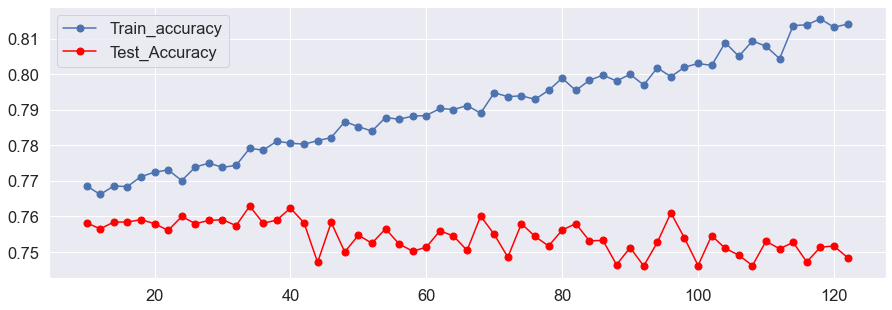

Best value (Hidden Layer Sizes):  34.0
Test (Validation) accuracy:  76.29 %


In [16]:
plt.figure(figsize=(15, 5))
sns.set(font_scale=1.5)
plt.plot(resHLS['Hidden Layer Sizes'], resHLS['Train_Accuracy'], marker='o', markersize=7)
plt.plot(resHLS['Hidden Layer Sizes'], resHLS['Test_Accuracy'], marker='o', markersize=7, color="red")
plt.legend(['Train_accuracy', 'Test_Accuracy'])
plt.show()

best_max_depth = res_SortedV4.loc[res_SortedV4['Test_Accuracy'].idxmax(), 'Hidden Layer Sizes']
best_max_depth_Acc = res_SortedV4.loc[res_SortedV4['Test_Accuracy'].idxmax(), 'Test_Accuracy']

print("Best value (Hidden Layer Sizes): ", best_max_depth)
print("Test (Validation) accuracy: ", round(best_max_depth_Acc*100, 2), "%")

# Hidden Layer Sizes - Number Of Layers

In [31]:
layer_List = [(40), (40,40), (40,40,40),(40,40,40,40),(34),(34,34),(34,34,34),(34,34,34,34),(96),(96,96),(96,96,96),(96,96,96,96)]
print(layer_List)

[40, (40, 40), (40, 40, 40), (40, 40, 40, 40), 34, (34, 34), (34, 34, 34), (34, 34, 34, 34), 96, (96, 96), (96, 96, 96), (96, 96, 96, 96)]


In [32]:
resHLS = pd.DataFrame()
for hidden_layer_sizes in layer_List:
    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, random_state=123, max_iter=1000, verbose = True,)
    print("------------ Number Of Neurons: ",hidden_layer_sizes, " ------------")
    model.fit(X_train_scaled, y_train)
    resHLS = resHLS.append({'Hidden Layer Sizes': hidden_layer_sizes,
                      'Train_Accuracy': accuracy_score(y_train, model.predict(X_train_scaled)),
                      'Test_Accuracy': accuracy_score(y_test, model.predict(X_test_scaled))}, ignore_index=True)
    

------------ Number Of Neurons:  40  ------------
Iteration 1, loss = 0.55104180
Iteration 2, loss = 0.47476677
Iteration 3, loss = 0.46640926
Iteration 4, loss = 0.46216000
Iteration 5, loss = 0.45858362
Iteration 6, loss = 0.45651545
Iteration 7, loss = 0.45501084
Iteration 8, loss = 0.45395371
Iteration 9, loss = 0.45292338
Iteration 10, loss = 0.45217275
Iteration 11, loss = 0.45166821
Iteration 12, loss = 0.45107564
Iteration 13, loss = 0.45082586
Iteration 14, loss = 0.45046048
Iteration 15, loss = 0.45001626
Iteration 16, loss = 0.44983211
Iteration 17, loss = 0.44936999
Iteration 18, loss = 0.44899072
Iteration 19, loss = 0.44866742
Iteration 20, loss = 0.44873228
Iteration 21, loss = 0.44844696
Iteration 22, loss = 0.44815667
Iteration 23, loss = 0.44788347
Iteration 24, loss = 0.44747323
Iteration 25, loss = 0.44723578
Iteration 26, loss = 0.44708864
Iteration 27, loss = 0.44719485
Iteration 28, loss = 0.44677711
Iteration 29, loss = 0.44646350
Iteration 30, loss = 0.44630239

Iteration 79, loss = 0.41268063
Iteration 80, loss = 0.41330184
Iteration 81, loss = 0.41318767
Iteration 82, loss = 0.41232845
Iteration 83, loss = 0.41229282
Iteration 84, loss = 0.41292737
Iteration 85, loss = 0.41182791
Iteration 86, loss = 0.41179164
Iteration 87, loss = 0.41144034
Iteration 88, loss = 0.41106033
Iteration 89, loss = 0.41062627
Iteration 90, loss = 0.41118466
Iteration 91, loss = 0.41109235
Iteration 92, loss = 0.41018822
Iteration 93, loss = 0.40982406
Iteration 94, loss = 0.41005223
Iteration 95, loss = 0.40929006
Iteration 96, loss = 0.40859145
Iteration 97, loss = 0.40854447
Iteration 98, loss = 0.40951585
Iteration 99, loss = 0.40817762
Iteration 100, loss = 0.40819044
Iteration 101, loss = 0.40770776
Iteration 102, loss = 0.40756302
Iteration 103, loss = 0.40722868
Iteration 104, loss = 0.40739094
Iteration 105, loss = 0.40713485
Iteration 106, loss = 0.40702580
Iteration 107, loss = 0.40677037
Iteration 108, loss = 0.40704908
Iteration 109, loss = 0.4058950

Iteration 328, loss = 0.38298151
Iteration 329, loss = 0.38307046
Iteration 330, loss = 0.38355078
Iteration 331, loss = 0.38353924
Iteration 332, loss = 0.38335406
Iteration 333, loss = 0.38276819
Iteration 334, loss = 0.38277441
Iteration 335, loss = 0.38373035
Iteration 336, loss = 0.38316519
Iteration 337, loss = 0.38272865
Iteration 338, loss = 0.38323989
Iteration 339, loss = 0.38327275
Iteration 340, loss = 0.38248062
Iteration 341, loss = 0.38286717
Iteration 342, loss = 0.38291941
Iteration 343, loss = 0.38234482
Iteration 344, loss = 0.38250313
Iteration 345, loss = 0.38248362
Iteration 346, loss = 0.38280005
Iteration 347, loss = 0.38202293
Iteration 348, loss = 0.38275275
Iteration 349, loss = 0.38170777
Iteration 350, loss = 0.38217144
Iteration 351, loss = 0.38236703
Iteration 352, loss = 0.38126763
Iteration 353, loss = 0.38297506
Iteration 354, loss = 0.38220915
Iteration 355, loss = 0.38195592
Iteration 356, loss = 0.38198644
Iteration 357, loss = 0.38235275
Iteration 

Iteration 212, loss = 0.33916916
Iteration 213, loss = 0.33968607
Iteration 214, loss = 0.34028276
Iteration 215, loss = 0.33952136
Iteration 216, loss = 0.33954035
Iteration 217, loss = 0.33859547
Iteration 218, loss = 0.33897943
Iteration 219, loss = 0.33842302
Iteration 220, loss = 0.33780328
Iteration 221, loss = 0.33869362
Iteration 222, loss = 0.33746265
Iteration 223, loss = 0.33641507
Iteration 224, loss = 0.33882152
Iteration 225, loss = 0.33745933
Iteration 226, loss = 0.33758162
Iteration 227, loss = 0.33755613
Iteration 228, loss = 0.33624405
Iteration 229, loss = 0.33681208
Iteration 230, loss = 0.33641483
Iteration 231, loss = 0.33753062
Iteration 232, loss = 0.33601383
Iteration 233, loss = 0.33525390
Iteration 234, loss = 0.33571022
Iteration 235, loss = 0.33527569
Iteration 236, loss = 0.33515301
Iteration 237, loss = 0.33478699
Iteration 238, loss = 0.33386680
Iteration 239, loss = 0.33412086
Iteration 240, loss = 0.33577026
Iteration 241, loss = 0.33539238
Iteration 

Iteration 123, loss = 0.32558108
Iteration 124, loss = 0.32249048
Iteration 125, loss = 0.32118773
Iteration 126, loss = 0.32305714
Iteration 127, loss = 0.32130271
Iteration 128, loss = 0.32267287
Iteration 129, loss = 0.32059619
Iteration 130, loss = 0.32045875
Iteration 131, loss = 0.32090394
Iteration 132, loss = 0.31916612
Iteration 133, loss = 0.31807606
Iteration 134, loss = 0.31715221
Iteration 135, loss = 0.31736002
Iteration 136, loss = 0.31855174
Iteration 137, loss = 0.31812275
Iteration 138, loss = 0.31700871
Iteration 139, loss = 0.31669498
Iteration 140, loss = 0.31652857
Iteration 141, loss = 0.31432410
Iteration 142, loss = 0.31634673
Iteration 143, loss = 0.31422842
Iteration 144, loss = 0.31381005
Iteration 145, loss = 0.31246452
Iteration 146, loss = 0.31265464
Iteration 147, loss = 0.31142516
Iteration 148, loss = 0.31236253
Iteration 149, loss = 0.31101892
Iteration 150, loss = 0.31124630
Iteration 151, loss = 0.31123314
Iteration 152, loss = 0.30987475
Iteration 

Iteration 372, loss = 0.25019147
Iteration 373, loss = 0.24754511
Iteration 374, loss = 0.24852469
Iteration 375, loss = 0.24961530
Iteration 376, loss = 0.24906816
Iteration 377, loss = 0.24785691
Iteration 378, loss = 0.24976443
Iteration 379, loss = 0.24786032
Iteration 380, loss = 0.25061341
Iteration 381, loss = 0.24999805
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
------------ Number Of Neurons:  34  ------------
Iteration 1, loss = 0.51715370
Iteration 2, loss = 0.47178279
Iteration 3, loss = 0.46514666
Iteration 4, loss = 0.46159834
Iteration 5, loss = 0.45875567
Iteration 6, loss = 0.45700207
Iteration 7, loss = 0.45559641
Iteration 8, loss = 0.45457159
Iteration 9, loss = 0.45367497
Iteration 10, loss = 0.45289793
Iteration 11, loss = 0.45229607
Iteration 12, loss = 0.45169658
Iteration 13, loss = 0.45118979
Iteration 14, loss = 0.45075914
Iteration 15, loss = 0.45011171
Iteration 16, loss = 0.44988663
Iteration 17, loss = 0.4495

Iteration 82, loss = 0.41964126
Iteration 83, loss = 0.41929071
Iteration 84, loss = 0.41942208
Iteration 85, loss = 0.41889751
Iteration 86, loss = 0.41900446
Iteration 87, loss = 0.41849405
Iteration 88, loss = 0.41816205
Iteration 89, loss = 0.41803802
Iteration 90, loss = 0.41801916
Iteration 91, loss = 0.41799377
Iteration 92, loss = 0.41756635
Iteration 93, loss = 0.41737864
Iteration 94, loss = 0.41723100
Iteration 95, loss = 0.41696062
Iteration 96, loss = 0.41705387
Iteration 97, loss = 0.41702934
Iteration 98, loss = 0.41667333
Iteration 99, loss = 0.41641253
Iteration 100, loss = 0.41594922
Iteration 101, loss = 0.41613246
Iteration 102, loss = 0.41596983
Iteration 103, loss = 0.41551283
Iteration 104, loss = 0.41530915
Iteration 105, loss = 0.41554516
Iteration 106, loss = 0.41478515
Iteration 107, loss = 0.41463198
Iteration 108, loss = 0.41484721
Iteration 109, loss = 0.41450746
Iteration 110, loss = 0.41459051
Iteration 111, loss = 0.41417746
Iteration 112, loss = 0.4145

Iteration 72, loss = 0.40147316
Iteration 73, loss = 0.40050747
Iteration 74, loss = 0.39982689
Iteration 75, loss = 0.39917824
Iteration 76, loss = 0.39793761
Iteration 77, loss = 0.39801670
Iteration 78, loss = 0.39726216
Iteration 79, loss = 0.39829017
Iteration 80, loss = 0.39650173
Iteration 81, loss = 0.39583640
Iteration 82, loss = 0.39533535
Iteration 83, loss = 0.39433103
Iteration 84, loss = 0.39443057
Iteration 85, loss = 0.39382607
Iteration 86, loss = 0.39338273
Iteration 87, loss = 0.39317991
Iteration 88, loss = 0.39232627
Iteration 89, loss = 0.39229563
Iteration 90, loss = 0.39218180
Iteration 91, loss = 0.39189656
Iteration 92, loss = 0.39114294
Iteration 93, loss = 0.39021699
Iteration 94, loss = 0.38944970
Iteration 95, loss = 0.38918370
Iteration 96, loss = 0.38910735
Iteration 97, loss = 0.38835352
Iteration 98, loss = 0.38842116
Iteration 99, loss = 0.38805053
Iteration 100, loss = 0.38837570
Iteration 101, loss = 0.38817732
Iteration 102, loss = 0.38674838
Itera

Iteration 4, loss = 0.45730071
Iteration 5, loss = 0.45374643
Iteration 6, loss = 0.45096696
Iteration 7, loss = 0.44948045
Iteration 8, loss = 0.44724123
Iteration 9, loss = 0.44557277
Iteration 10, loss = 0.44428725
Iteration 11, loss = 0.44247633
Iteration 12, loss = 0.44098945
Iteration 13, loss = 0.43952147
Iteration 14, loss = 0.43786286
Iteration 15, loss = 0.43668772
Iteration 16, loss = 0.43490234
Iteration 17, loss = 0.43411636
Iteration 18, loss = 0.43231552
Iteration 19, loss = 0.43134587
Iteration 20, loss = 0.42965217
Iteration 21, loss = 0.42835263
Iteration 22, loss = 0.42737836
Iteration 23, loss = 0.42552414
Iteration 24, loss = 0.42440107
Iteration 25, loss = 0.42350217
Iteration 26, loss = 0.42138768
Iteration 27, loss = 0.41953659
Iteration 28, loss = 0.41934968
Iteration 29, loss = 0.41681859
Iteration 30, loss = 0.41560956
Iteration 31, loss = 0.41502493
Iteration 32, loss = 0.41325156
Iteration 33, loss = 0.41235129
Iteration 34, loss = 0.41010147
Iteration 35, 

Iteration 256, loss = 0.31040218
Iteration 257, loss = 0.30956822
Iteration 258, loss = 0.31094147
Iteration 259, loss = 0.31066099
Iteration 260, loss = 0.30975550
Iteration 261, loss = 0.31054702
Iteration 262, loss = 0.30897425
Iteration 263, loss = 0.30914173
Iteration 264, loss = 0.30936504
Iteration 265, loss = 0.30923137
Iteration 266, loss = 0.30853928
Iteration 267, loss = 0.30828218
Iteration 268, loss = 0.30816877
Iteration 269, loss = 0.30882055
Iteration 270, loss = 0.30666019
Iteration 271, loss = 0.30744001
Iteration 272, loss = 0.30729380
Iteration 273, loss = 0.30782903
Iteration 274, loss = 0.30848116
Iteration 275, loss = 0.30703291
Iteration 276, loss = 0.30656122
Iteration 277, loss = 0.30685446
Iteration 278, loss = 0.30699362
Iteration 279, loss = 0.30661765
Iteration 280, loss = 0.30584973
Iteration 281, loss = 0.30761824
Iteration 282, loss = 0.30735388
Iteration 283, loss = 0.30788359
Iteration 284, loss = 0.30560203
Iteration 285, loss = 0.30554274
Iteration 

Iteration 141, loss = 0.41742845
Iteration 142, loss = 0.41707354
Iteration 143, loss = 0.41686065
Iteration 144, loss = 0.41688870
Iteration 145, loss = 0.41631212
Iteration 146, loss = 0.41727439
Iteration 147, loss = 0.41677212
Iteration 148, loss = 0.41666678
Iteration 149, loss = 0.41568428
Iteration 150, loss = 0.41577153
Iteration 151, loss = 0.41678771
Iteration 152, loss = 0.41587406
Iteration 153, loss = 0.41644068
Iteration 154, loss = 0.41573503
Iteration 155, loss = 0.41582115
Iteration 156, loss = 0.41575930
Iteration 157, loss = 0.41511098
Iteration 158, loss = 0.41534239
Iteration 159, loss = 0.41488845
Iteration 160, loss = 0.41520142
Iteration 161, loss = 0.41513761
Iteration 162, loss = 0.41503589
Iteration 163, loss = 0.41501213
Iteration 164, loss = 0.41526118
Iteration 165, loss = 0.41460644
Iteration 166, loss = 0.41444488
Iteration 167, loss = 0.41440394
Iteration 168, loss = 0.41385679
Iteration 169, loss = 0.41502269
Iteration 170, loss = 0.41430806
Iteration 

Iteration 201, loss = 0.21691466
Iteration 202, loss = 0.21903510
Iteration 203, loss = 0.21693625
Iteration 204, loss = 0.21515939
Iteration 205, loss = 0.21530064
Iteration 206, loss = 0.21678599
Iteration 207, loss = 0.21257064
Iteration 208, loss = 0.21494835
Iteration 209, loss = 0.21502374
Iteration 210, loss = 0.21136324
Iteration 211, loss = 0.21328796
Iteration 212, loss = 0.21451368
Iteration 213, loss = 0.20917950
Iteration 214, loss = 0.21019240
Iteration 215, loss = 0.20903842
Iteration 216, loss = 0.21050461
Iteration 217, loss = 0.21096144
Iteration 218, loss = 0.20536821
Iteration 219, loss = 0.20847433
Iteration 220, loss = 0.20787893
Iteration 221, loss = 0.21272008
Iteration 222, loss = 0.20749213
Iteration 223, loss = 0.20660308
Iteration 224, loss = 0.20362297
Iteration 225, loss = 0.20797727
Iteration 226, loss = 0.20478361
Iteration 227, loss = 0.20408467
Iteration 228, loss = 0.20757095
Iteration 229, loss = 0.20354828
Iteration 230, loss = 0.20320284
Iteration 

Iteration 51, loss = 0.24048293
Iteration 52, loss = 0.23879963
Iteration 53, loss = 0.23316403
Iteration 54, loss = 0.23144178
Iteration 55, loss = 0.22644532
Iteration 56, loss = 0.22287866
Iteration 57, loss = 0.21966297
Iteration 58, loss = 0.21575024
Iteration 59, loss = 0.21322621
Iteration 60, loss = 0.21041269
Iteration 61, loss = 0.20546979
Iteration 62, loss = 0.20420274
Iteration 63, loss = 0.19742244
Iteration 64, loss = 0.19799599
Iteration 65, loss = 0.19276390
Iteration 66, loss = 0.19201454
Iteration 67, loss = 0.18637295
Iteration 68, loss = 0.18264507
Iteration 69, loss = 0.18126157
Iteration 70, loss = 0.17657799
Iteration 71, loss = 0.17741652
Iteration 72, loss = 0.17051145
Iteration 73, loss = 0.17051642
Iteration 74, loss = 0.16700849
Iteration 75, loss = 0.16645799
Iteration 76, loss = 0.16641943
Iteration 77, loss = 0.15970955
Iteration 78, loss = 0.15525766
Iteration 79, loss = 0.15175037
Iteration 80, loss = 0.15367733
Iteration 81, loss = 0.14777692
Iteratio

Iteration 28, loss = 0.27891522
Iteration 29, loss = 0.27356303
Iteration 30, loss = 0.26345466
Iteration 31, loss = 0.25837506
Iteration 32, loss = 0.24889836
Iteration 33, loss = 0.24258185
Iteration 34, loss = 0.23480806
Iteration 35, loss = 0.22495904
Iteration 36, loss = 0.22198818
Iteration 37, loss = 0.21257194
Iteration 38, loss = 0.21028575
Iteration 39, loss = 0.19962883
Iteration 40, loss = 0.19610961
Iteration 41, loss = 0.19059421
Iteration 42, loss = 0.18058193
Iteration 43, loss = 0.17662174
Iteration 44, loss = 0.17369948
Iteration 45, loss = 0.17327812
Iteration 46, loss = 0.16592327
Iteration 47, loss = 0.15305685
Iteration 48, loss = 0.15147424
Iteration 49, loss = 0.15049760
Iteration 50, loss = 0.14268813
Iteration 51, loss = 0.13997530
Iteration 52, loss = 0.14063985
Iteration 53, loss = 0.13222025
Iteration 54, loss = 0.12550404
Iteration 55, loss = 0.12464248
Iteration 56, loss = 0.12581157
Iteration 57, loss = 0.11405958
Iteration 58, loss = 0.11702486
Iteratio

In [42]:
res_SortedV5 = resHLS.copy().sort_values('Test_Accuracy', ascending=False, ignore_index= True)
res_SortedV5

,Hidden Layer Sizes,Train_Accuracy,Test_Accuracy
0,"(96, 96, 96, 96)",0.986729,0.783638
1,"(96, 96, 96)",1.000000,0.782404
2,"(96, 96)",0.943606,0.768376
3,34.0,0.779109,0.762877
4,40.0,0.780568,0.762316
5,96.0,0.799282,0.760970
6,"(40, 40, 40, 40)",0.899585,0.753451
7,"(40, 40)",0.820465,0.749411
8,"(34, 34)",0.808092,0.747840
9,"(34, 34, 34)",0.840189,0.745932


In [43]:
res_SortedV5['Hidden Layer Sizes'] = res_SortedV5['Hidden Layer Sizes'].apply(lambda x: str(x))
res_SortedV5

,Hidden Layer Sizes,Train_Accuracy,Test_Accuracy
0,"(96, 96, 96, 96)",0.986729,0.783638
1,"(96, 96, 96)",1.000000,0.782404
2,"(96, 96)",0.943606,0.768376
3,34.0,0.779109,0.762877
4,40.0,0.780568,0.762316
5,96.0,0.799282,0.760970
6,"(40, 40, 40, 40)",0.899585,0.753451
7,"(40, 40)",0.820465,0.749411
8,"(34, 34)",0.808092,0.747840
9,"(34, 34, 34)",0.840189,0.745932


In [40]:
res_SortedV5['Hidden Layer Sizes2'] = res_SortedV5['Hidden Layer Sizes'].apply(lambda x: ",".join(str(y) for y in x))
res_SortedV5


,Hidden Layer Sizes,Train_Accuracy,Test_Accuracy,Hidden Layer Sizes2
0,"(96, 96, 96, 96)",0.986729,0.783638,"(,9,6,,, ,9,6,,, ,9,6,,, ,9,6,)"
1,"(96, 96, 96)",1.000000,0.782404,"(,9,6,,, ,9,6,,, ,9,6,)"
2,"(96, 96)",0.943606,0.768376,"(,9,6,,, ,9,6,)"
3,34.0,0.779109,0.762877,"3,4,.,0"
4,40.0,0.780568,0.762316,"4,0,.,0"
5,96.0,0.799282,0.760970,"9,6,.,0"
6,"(40, 40, 40, 40)",0.899585,0.753451,"(,4,0,,, ,4,0,,, ,4,0,,, ,4,0,)"
7,"(40, 40)",0.820465,0.749411,"(,4,0,,, ,4,0,)"
8,"(34, 34)",0.808092,0.747840,"(,3,4,,, ,3,4,)"
9,"(34, 34, 34)",0.840189,0.745932,"(,3,4,,, ,3,4,,, ,3,4,)"


In [37]:
import pandas as pd

# Create a DataFrame with a column containing tuples
df = pd.DataFrame({'tuple_column': [(40, 40), (50, 50), (60, 60)]})

# Convert the tuples into strings using a lambda function and the join() method
df['string_column'] = df['tuple_column'].apply(lambda x: ", ".join(str(y) for y in x))



,tuple_column,string_column
0,"(40, 40)","40, 40"
1,"(50, 50)","50, 50"
2,"(60, 60)","60, 60"


In [ ]:
#res_SortedV5

In [ ]:
# res_SortedV5['Hidden Layer Sizes']  = ", ".join(str(x) for x in res_SortedV5['Hidden Layer Sizes'])
# res_SortedV5

In [35]:
best_max_depth = res_SortedV4.loc[res_SortedV5['Test_Accuracy'].idxmax(), 'Hidden Layer Sizes']
best_max_depth_Acc = res_SortedV4.loc[res_SortedV5['Test_Accuracy'].idxmax(), 'Test_Accuracy']
print("Best value (Hidden Layer Sizes): ", best_max_depth)
print("Test (Validation) accuracy: ", round(best_max_depth_Acc*100, 2), "%")

Best value (Hidden Layer Sizes):  34.0
Test (Validation) accuracy:  76.29 %


# Grid Search

In [16]:
param_grid = {
     'hidden_layer_sizes': [(96, 96, 96),(96, 96, 96, 96)],
     'activation': ['logistic', 'tanh'],            
     'solver': ['sgd'],        
     'learning_rate': ['constant', 'adaptive'],
     'learning_rate_init': [0.004] }     

grid_search = GridSearchCV(estimator=MLPClassifier(max_iter=150, random_state=123),
                           param_grid=param_grid,
                           refit=True,
                           cv=10, verbose=3)

In [17]:
comb = 1
for list_ in param_grid.values():
    comb *= len(list_)
print("Number of Combinations: ", comb)

Number of Combinations:  8


In [19]:
grid_search.fit(X_train_scaled, y_train)
model = grid_search.best_estimator_
results = pd.DataFrame(grid_search.cv_results_)
results['hidden_layer_sizes'] = results['params'].apply(lambda x: x['hidden_layer_sizes'])
results['activation'] = results['params'].apply(lambda x: x['activation'])
results['solver'] = results['params'].apply(lambda x: x['solver'])
results['learning_rate'] = results['params'].apply(lambda x: x['learning_rate'])
results['learning_rate_init'] = results['params'].apply(lambda x: x['learning_rate_init'])
results

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 1/10] END activation=logistic, hidden_layer_sizes=(96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.756 total time= 1.1min
[CV 2/10] END activation=logistic, hidden_layer_sizes=(96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.742 total time=  59.2s
[CV 3/10] END activation=logistic, hidden_layer_sizes=(96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.749 total time= 1.1min
[CV 4/10] END activation=logistic, hidden_layer_sizes=(96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.747 total time=  57.7s
[CV 5/10] END activation=logistic, hidden_layer_sizes=(96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.746 total time=  56.1s
[CV 6/10] END activation=logistic, hidden_layer_sizes=(96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;

C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/10] END activation=logistic, hidden_layer_sizes=(96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.747 total time= 1.3min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/10] END activation=logistic, hidden_layer_sizes=(96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.744 total time= 1.2min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/10] END activation=logistic, hidden_layer_sizes=(96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.748 total time= 1.2min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/10] END activation=logistic, hidden_layer_sizes=(96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.753 total time= 1.3min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/10] END activation=logistic, hidden_layer_sizes=(96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.744 total time= 1.3min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 6/10] END activation=logistic, hidden_layer_sizes=(96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.742 total time= 1.2min
[CV 7/10] END activation=logistic, hidden_layer_sizes=(96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.747 total time= 1.2min
[CV 8/10] END activation=logistic, hidden_layer_sizes=(96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.752 total time= 1.2min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 9/10] END activation=logistic, hidden_layer_sizes=(96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.748 total time= 1.3min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 10/10] END activation=logistic, hidden_layer_sizes=(96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.741 total time= 1.2min
[CV 1/10] END activation=logistic, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.634 total time=   9.9s
[CV 2/10] END activation=logistic, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.634 total time=  11.8s
[CV 3/10] END activation=logistic, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.634 total time=   8.9s
[CV 4/10] END activation=logistic, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.634 total time=   9.1s
[CV 5/10] END activation=logistic, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.634 total time=   9.6s
[CV 6/1

C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.765 total time= 1.5min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.745 total time= 1.4min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.749 total time= 1.4min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.752 total time= 1.4min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.753 total time= 1.4min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 6/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.752 total time= 1.4min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 7/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.748 total time= 1.4min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 8/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.747 total time= 1.6min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 9/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.758 total time= 1.4min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 10/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.739 total time= 1.4min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.765 total time= 1.5min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.745 total time= 1.4min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.749 total time= 1.7min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.752 total time= 1.6min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.753 total time= 1.7min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 6/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.752 total time= 1.7min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 7/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.748 total time= 1.5min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 8/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.747 total time= 1.6min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 9/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.758 total time= 1.5min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 10/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.739 total time= 1.6min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.765 total time= 2.1min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.749 total time= 2.1min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.761 total time= 2.2min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.753 total time= 2.2min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.753 total time= 2.2min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 6/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.751 total time= 2.1min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 7/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.757 total time= 2.3min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 8/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.758 total time= 2.1min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 9/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.753 total time= 2.1min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 10/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=constant, learning_rate_init=0.004, solver=sgd;, score=0.753 total time= 2.1min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.765 total time= 2.0min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.749 total time= 2.0min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.761 total time= 1.9min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.753 total time= 1.9min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.753 total time= 2.0min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 6/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.751 total time= 2.1min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 7/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.757 total time= 2.0min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 8/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.758 total time= 2.1min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 9/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.753 total time= 2.1min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 10/10] END activation=tanh, hidden_layer_sizes=(96, 96, 96, 96), learning_rate=adaptive, learning_rate_init=0.004, solver=sgd;, score=0.753 total time= 2.1min


C:\Users\Lital\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_learning_rate,param_learning_rate_init,param_solver,params,...,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,hidden_layer_sizes,activation,solver,learning_rate,learning_rate_init
0,56.983178,6.189938,0.023127,0.009802,logistic,"(96, 96, 96)",constant,0.004,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",...,0.748036,0.741863,0.746591,0.004356,6,"(96, 96, 96)",logistic,sgd,constant,0.004
1,75.365451,2.543390,0.018440,0.006024,logistic,"(96, 96, 96)",adaptive,0.004,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",...,0.748036,0.741021,0.746619,0.003601,5,"(96, 96, 96)",logistic,sgd,adaptive,0.004
2,9.595050,0.817422,0.019620,0.005497,logistic,"(96, 96, 96, 96)",constant,0.004,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",...,0.634119,0.634119,0.634168,0.000087,7,"(96, 96, 96, 96)",logistic,sgd,constant,0.004
3,56.690985,3.047498,0.021037,0.005523,logistic,"(96, 96, 96, 96)",adaptive,0.004,sgd,"{'activation': 'logistic', 'hidden_layer_sizes...",...,0.634119,0.634119,0.634168,0.000087,7,"(96, 96, 96, 96)",logistic,sgd,adaptive,0.004
4,86.957916,3.834909,0.023598,0.005261,tanh,"(96, 96, 96)",constant,0.004,sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",...,0.757576,0.739057,0.750771,0.006786,3,"(96, 96, 96)",tanh,sgd,constant,0.004
5,94.201494,4.985578,0.036466,0.020894,tanh,"(96, 96, 96)",adaptive,0.004,sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",...,0.757576,0.739057,0.750771,0.006786,3,"(96, 96, 96)",tanh,sgd,adaptive,0.004
6,128.666277,3.967994,0.031509,0.007174,tanh,"(96, 96, 96, 96)",constant,0.004,sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",...,0.753086,0.752806,0.755261,0.004640,1,"(96, 96, 96, 96)",tanh,sgd,constant,0.004
7,121.165287,3.983364,0.034437,0.006783,tanh,"(96, 96, 96, 96)",adaptive,0.004,sgd,"{'activation': 'tanh', 'hidden_layer_sizes': (...",...,0.753086,0.752806,0.755261,0.004640,1,"(96, 96, 96, 96)",tanh,sgd,adaptive,0.004


In [20]:
res_SortedV = results.copy().sort_values('mean_test_score', ascending=False, ignore_index= True)
res_SortedV
TopRes = res_SortedV.loc[:,['hidden_layer_sizes','activation','activation','solver','learning_rate','learning_rate_init', 'std_test_score','mean_test_score']]
TopRes.head(10)

,hidden_layer_sizes,activation,activation,solver,learning_rate,learning_rate_init,std_test_score,mean_test_score
0,"(96, 96, 96, 96)",tanh,tanh,sgd,constant,0.004,0.004640,0.755261
1,"(96, 96, 96, 96)",tanh,tanh,sgd,adaptive,0.004,0.004640,0.755261
2,"(96, 96, 96)",tanh,tanh,sgd,constant,0.004,0.006786,0.750771
3,"(96, 96, 96)",tanh,tanh,sgd,adaptive,0.004,0.006786,0.750771
4,"(96, 96, 96)",logistic,logistic,sgd,adaptive,0.004,0.003601,0.746619
5,"(96, 96, 96)",logistic,logistic,sgd,constant,0.004,0.004356,0.746591
6,"(96, 96, 96, 96)",logistic,logistic,sgd,constant,0.004,0.000087,0.634168
7,"(96, 96, 96, 96)",logistic,logistic,sgd,adaptive,0.004,0.000087,0.634168


# Best Model Check :

# First Option :

In [26]:
from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(96, 96, 96, 96),activation='tanh',solver='sgd',learning_rate='constant',learning_rate_init=0.004,max_iter=1000  ,verbose = True)

# Fit the model using the training data
clf.fit(X_train_scaled, y_train)

Iteration 1, loss = 0.49559923
Iteration 2, loss = 0.47260068
Iteration 3, loss = 0.47046170
Iteration 4, loss = 0.46958200
Iteration 5, loss = 0.46800641
Iteration 6, loss = 0.46694364
Iteration 7, loss = 0.46583561
Iteration 8, loss = 0.46476903
Iteration 9, loss = 0.46384683
Iteration 10, loss = 0.46282372
Iteration 11, loss = 0.46168766
Iteration 12, loss = 0.46118272
Iteration 13, loss = 0.45982574
Iteration 14, loss = 0.45890401
Iteration 15, loss = 0.45821791
Iteration 16, loss = 0.45693890
Iteration 17, loss = 0.45606332
Iteration 18, loss = 0.45561582
Iteration 19, loss = 0.45485971
Iteration 20, loss = 0.45418165
Iteration 21, loss = 0.45356788
Iteration 22, loss = 0.45260928
Iteration 23, loss = 0.45191684
Iteration 24, loss = 0.45156806
Iteration 25, loss = 0.45094196
Iteration 26, loss = 0.45064072
Iteration 27, loss = 0.45013193
Iteration 28, loss = 0.44987481
Iteration 29, loss = 0.44906219
Iteration 30, loss = 0.44872179
Iteration 31, loss = 0.44835833
Iteration 32, los

Iteration 253, loss = 0.25933682
Iteration 254, loss = 0.25772406
Iteration 255, loss = 0.25617457
Iteration 256, loss = 0.25370538
Iteration 257, loss = 0.25235423
Iteration 258, loss = 0.25015711
Iteration 259, loss = 0.24939635
Iteration 260, loss = 0.24650557
Iteration 261, loss = 0.24551830
Iteration 262, loss = 0.24300004
Iteration 263, loss = 0.24119222
Iteration 264, loss = 0.23867686
Iteration 265, loss = 0.23626070
Iteration 266, loss = 0.23583429
Iteration 267, loss = 0.23264840
Iteration 268, loss = 0.23140713
Iteration 269, loss = 0.22846701
Iteration 270, loss = 0.22744351
Iteration 271, loss = 0.22533374
Iteration 272, loss = 0.22351042
Iteration 273, loss = 0.22139667
Iteration 274, loss = 0.21997026
Iteration 275, loss = 0.21784023
Iteration 276, loss = 0.21537738
Iteration 277, loss = 0.21276987
Iteration 278, loss = 0.21188350
Iteration 279, loss = 0.20925083
Iteration 280, loss = 0.20605976
Iteration 281, loss = 0.20533643
Iteration 282, loss = 0.20325889
Iteration 

Iteration 502, loss = 0.00418459
Iteration 503, loss = 0.00417878
Iteration 504, loss = 0.00410028
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='tanh', hidden_layer_sizes=(96, 96, 96, 96),
              learning_rate_init=0.004, max_iter=1000, solver='sgd',
              verbose=True)

In [27]:
# Make predictions on the test data
y_train_pred = clf.predict(X_train_scaled)

# Calculate the accuracy
print("Train")
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


# Make predictions on the test data
y_test_pred = clf.predict(X_test_scaled)

# Calculate the accuracy
print("\nTest")
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Train
Accuracy: 100.00%

Test
Accuracy: 76.74%


# Second Option :

In [28]:
from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(96, 96, 96, 96),activation='tanh',solver='sgd',learning_rate='adaptive',learning_rate_init=0.004,max_iter=1000  ,verbose = True)

# Fit the model using the training data
clf.fit(X_train_scaled, y_train)

Iteration 1, loss = 0.50205851
Iteration 2, loss = 0.47101026
Iteration 3, loss = 0.46854377
Iteration 4, loss = 0.46671679
Iteration 5, loss = 0.46517373
Iteration 6, loss = 0.46394549
Iteration 7, loss = 0.46318589
Iteration 8, loss = 0.46146605
Iteration 9, loss = 0.46093055
Iteration 10, loss = 0.45983321
Iteration 11, loss = 0.45878707
Iteration 12, loss = 0.45818889
Iteration 13, loss = 0.45728073
Iteration 14, loss = 0.45691187
Iteration 15, loss = 0.45578813
Iteration 16, loss = 0.45536967
Iteration 17, loss = 0.45479139
Iteration 18, loss = 0.45423793
Iteration 19, loss = 0.45371766
Iteration 20, loss = 0.45297666
Iteration 21, loss = 0.45252550
Iteration 22, loss = 0.45200360
Iteration 23, loss = 0.45126300
Iteration 24, loss = 0.45064927
Iteration 25, loss = 0.45040024
Iteration 26, loss = 0.44985069
Iteration 27, loss = 0.44940684
Iteration 28, loss = 0.44935086
Iteration 29, loss = 0.44878846
Iteration 30, loss = 0.44830645
Iteration 31, loss = 0.44794879
Iteration 32, los

Iteration 253, loss = 0.28399957
Iteration 254, loss = 0.28273726
Iteration 255, loss = 0.27973106
Iteration 256, loss = 0.27939336
Iteration 257, loss = 0.27822331
Iteration 258, loss = 0.27688635
Iteration 259, loss = 0.27340428
Iteration 260, loss = 0.27401320
Iteration 261, loss = 0.27042304
Iteration 262, loss = 0.26836153
Iteration 263, loss = 0.26799265
Iteration 264, loss = 0.26599561
Iteration 265, loss = 0.26481303
Iteration 266, loss = 0.26368145
Iteration 267, loss = 0.26134618
Iteration 268, loss = 0.25926300
Iteration 269, loss = 0.25752824
Iteration 270, loss = 0.25591532
Iteration 271, loss = 0.25405657
Iteration 272, loss = 0.25201513
Iteration 273, loss = 0.25010081
Iteration 274, loss = 0.24893802
Iteration 275, loss = 0.24633601
Iteration 276, loss = 0.24503309
Iteration 277, loss = 0.24364577
Iteration 278, loss = 0.24184925
Iteration 279, loss = 0.24142128
Iteration 280, loss = 0.23847761
Iteration 281, loss = 0.23649959
Iteration 282, loss = 0.23540031
Iteration 

Iteration 502, loss = 0.00426774
Iteration 503, loss = 0.00423455
Iteration 504, loss = 0.00415477
Iteration 505, loss = 0.00416473
Iteration 506, loss = 0.00405302
Iteration 507, loss = 0.00402612
Iteration 508, loss = 0.00396896
Iteration 509, loss = 0.00391138
Iteration 510, loss = 0.00390985
Iteration 511, loss = 0.00381030
Iteration 512, loss = 0.00379045
Iteration 513, loss = 0.00373849
Iteration 514, loss = 0.00374616
Iteration 515, loss = 0.00362552
Iteration 516, loss = 0.00363137
Iteration 517, loss = 0.00355052
Iteration 518, loss = 0.00354579
Iteration 519, loss = 0.00350780
Iteration 520, loss = 0.00344400
Iteration 521, loss = 0.00341818
Iteration 522, loss = 0.00336452
Iteration 523, loss = 0.00345885
Iteration 524, loss = 0.00331743
Iteration 525, loss = 0.00326620
Iteration 526, loss = 0.00322639
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000800
Iteration 527, loss = 0.00305850
Iteration 528, loss = 0.0029

MLPClassifier(activation='tanh', hidden_layer_sizes=(96, 96, 96, 96),
              learning_rate='adaptive', learning_rate_init=0.004, max_iter=1000,
              solver='sgd', verbose=True)

In [29]:
# Make predictions on the test data
y_train_pred = clf.predict(X_train_scaled)

# Calculate the accuracy
print("Train")
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


# Make predictions on the test data
y_test_pred = clf.predict(X_test_scaled)

# Calculate the accuracy
print("\nTest")
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Train
Accuracy: 100.00%

Test
Accuracy: 77.41%


# The Real Best Option :

In [8]:
from sklearn.neural_network import MLPClassifier

# Create an MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(96, 96, 96, 96),max_iter=1000  ,verbose = True)

# Fit the model using the training data
clf.fit(X_train_scaled, y_train)
# Make predictions on the test data
y_train_pred = clf.predict(X_train_scaled)

# Calculate the accuracy
print("Train")
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


# Make predictions on the test data
y_test_pred = clf.predict(X_test_scaled)

# Calculate the accuracy
print("\nTest")
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Iteration 1, loss = 0.48518231
Iteration 2, loss = 0.45984209
Iteration 3, loss = 0.45404534
Iteration 4, loss = 0.44983572
Iteration 5, loss = 0.44470383
Iteration 6, loss = 0.44040699
Iteration 7, loss = 0.43815661
Iteration 8, loss = 0.43276033
Iteration 9, loss = 0.42913855
Iteration 10, loss = 0.42294473
Iteration 11, loss = 0.41919987
Iteration 12, loss = 0.41354416
Iteration 13, loss = 0.40613474
Iteration 14, loss = 0.40167689
Iteration 15, loss = 0.39513689
Iteration 16, loss = 0.38801514
Iteration 17, loss = 0.37972267
Iteration 18, loss = 0.37229858
Iteration 19, loss = 0.36442269
Iteration 20, loss = 0.35790376
Iteration 21, loss = 0.34915367
Iteration 22, loss = 0.34084882
Iteration 23, loss = 0.33235427
Iteration 24, loss = 0.32663702
Iteration 25, loss = 0.31632615
Iteration 26, loss = 0.30693601
Iteration 27, loss = 0.30048090
Iteration 28, loss = 0.29291177
Iteration 29, loss = 0.28233178
Iteration 30, loss = 0.27664798
Iteration 31, loss = 0.26692871
Iteration 32, los

In [9]:
# Calculate the accuracy
print("Train")
accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy: {accuracy*100:.2f}%")


# Make predictions on the test data
y_test_pred = clf.predict(X_test_scaled)

# Calculate the accuracy
print("\nTest")
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Train
Accuracy: 100.00%

Test
Accuracy: 78.35%


# Confusion Matrix :

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_test_pred)
cm

<Figure size 1080x1080 with 0 Axes>

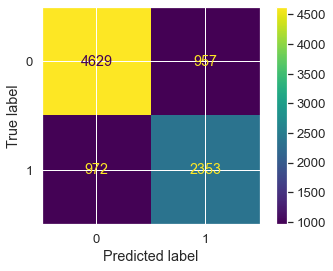

In [12]:
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                         display_labels=clf.classes_)
disp.plot()

# Predictions For Test

In [26]:
directory = r"C:\Users\RoiAz\Machine Learning Project\Part B\X_test_F.xlsx"
X_test = pd.read_excel(directory)
X_test = pd.DataFrame(X_test)
X_test = pd.get_dummies(X_test, columns=['Blood_Pressure'])
X_test

,gender,age,height(cm),weight(kg),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,...,AST,ALT,Gtp,dental caries,tartar,BMI,Blood_Pressure_High,Blood_Pressure_Normal,Blood_Pressure_Normal High,Blood_Pressure_Optimal
0,0,60,150,55,103.0,63.0,100.0,242.0,101.0,51.0,...,22.0,16.0,20.0,0,0,24.444444,0,0,0,1
1,0,50,145,55,127.0,75.0,100.0,242.0,89.0,66.0,...,18.0,15.0,17.0,0,1,26.159334,0,1,0,0
2,0,60,155,65,110.0,70.0,88.0,214.0,124.0,60.0,...,17.0,15.0,22.0,0,0,27.055151,0,0,0,1
3,1,55,180,85,108.0,74.0,119.0,110.0,155.0,37.0,...,21.0,24.0,35.0,0,0,26.234568,0,0,0,1
4,0,60,150,55,143.0,77.0,101.0,176.0,156.0,58.0,...,42.0,22.0,28.0,0,1,24.444444,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,1,40,175,95,130.0,86.0,92.0,204.0,236.0,36.0,...,25.0,34.0,28.0,0,1,31.020408,0,0,1,0
11135,0,45,155,50,145.0,100.0,99.0,254.0,102.0,80.0,...,19.0,11.0,17.0,0,1,20.811655,1,0,0,0
11136,0,45,165,60,117.0,79.0,87.0,182.0,29.0,60.0,...,28.0,16.0,12.0,0,0,22.038567,0,0,0,1
11137,0,50,150,55,118.0,78.0,93.0,165.0,88.0,51.0,...,19.0,12.0,17.0,0,1,24.444444,0,0,0,1


In [28]:
scaler = StandardScaler()
scaler.fit(X_test)

XX_test_scaled = scaler.transform(X_test)

In [29]:
y_test_pred = clf.predict(XX_test_scaled)

In [30]:
Y_pred = y_test_pred.copy()
Y_pred = pd.DataFrame(Y_pred, columns=['target'])

Y_pred

,target
0,0
1,0
2,0
3,1
4,0
...,...
11134,1
11135,0
11136,0
11137,0


In [31]:
output = r"C:\Users\RoiAz\Machine Learning Project\Part B"
with pd.ExcelWriter(output + "//" + 'y_test.xlsx') as writer:  
        Y_pred.to_excel(writer, sheet_name='Main', index=False)

# The End.